# Problem Statement:-
With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
pd.set_option('display.max_columns',100)  
pd.set_option('display.max_rows', 100) 


In [28]:
df=pd.read_csv('UsedCarsDetails.csv')

In [29]:
df

,Unnamed: 0,Car_Name,Fuel_type,Kilometers,Engine_disp,Gear_type,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,Weight,Insp_score,top_speed,Car_price
0,0,2016 Honda Jazz,Petrol,"39,821 kms",1199,Automatic,17.1,5,Golden Brown Metallic,88.50,Disc,Drum,354,1544,1694,3989,-,9,-,6.28 Lakh
1,1,2018 Mahindra Marazzo,Diesel,"41,071 kms",1497,Manual,17.3,7,Aqua Marine,121,Disc,Disc,190,1774,1866,4585,-,9.5,145kmph,10.15 Lakh
2,2,2015 Hyundai Grand i10,Petrol,"67,525 kms",1197,Manual,18.9,5,Pure white,82,Disc,Drum,256-liters,1520,1660,3765,-,7.5,165 Kmph,4.51 Lakh
3,3,2019 Jeep Compass,Petrol,"32,294 kms",1368,Automatic,16,5,Grey,160.77,Disc,Discs,408-litres,1640,1818,4395,-,9.5,186.69 kmph,16.78 Lakh
4,4,2016 Honda City,Petrol,"25,542 kms",1497,Manual,17.8,5,Golden,117.3,Disc,Drum,510-litres,1495,1695,4440,-,8.5,195 Kmph,7.33 Lakh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5685,5685,2017 Hyundai Grand i10,Petrol,"43,052 kms",1197,Manual,18.9,5,Red,81.86,Disc,Drum,256,1520,1660,3765,-,9,165 Kmph,4.23 Lakh
5686,5686,2016 Hyundai Creta,Diesel,"69,000 kms",1582,Automatic,17.6,5,Silver,126.2,Disc,Drum,400,1665,1780,4270,-,-,-,8.95 Lakh
5687,5687,2018 Mercedes-Benz GLA Class,Diesel,"55,000 kms",2143,Automatic,17.9,5,Red,136,Disc,Disc,421-litres,1494,1804,4424,2020,-,205 Kmph,24.75 Lakh
5688,5688,2017 Toyota Corolla Altis,Petrol,"60,000 kms",1798,Automatic,14.28,5,Silver,138.03,Ventilated Disc,Solid Disc,470-litres,1475,1776,4620,1640,-,200 Kmph,12.90 Lakh


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5690 entries, 0 to 5689
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        5690 non-null   int64 
 1   Car_Name          5690 non-null   object
 2   Fuel_type         5690 non-null   object
 3   Kilometers        5690 non-null   object
 4   Engine_disp       5690 non-null   object
 5   Gear_type         5690 non-null   object
 6   Milage_in_km/ltr  5690 non-null   object
 7   Seating_cap       5690 non-null   object
 8   color             5690 non-null   object
 9   Max_power         5690 non-null   object
 10  front_brake_type  5689 non-null   object
 11  rear_brake_type   5689 non-null   object
 12  cargo_volume      5689 non-null   object
 13  height            5689 non-null   object
 14  width             5689 non-null   object
 15  length            5689 non-null   object
 16  Weight            5689 non-null   object
 17  Insp_score    

In [31]:
df.Car_price

0        6.28 Lakh
1       10.15 Lakh
2        4.51 Lakh
3       16.78 Lakh
4        7.33 Lakh
           ...    
5685     4.23 Lakh
5686     8.95 Lakh
5687    24.75 Lakh
5688    12.90 Lakh
5689     3.15 Lakh
Name: Car_price, Length: 5690, dtype: object

In [32]:
df[df['Car_price']=="-"]

,Unnamed: 0,Car_Name,Fuel_type,Kilometers,Engine_disp,Gear_type,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,Weight,Insp_score,top_speed,Car_price


In [33]:
price=[]
for i in df['Car_price']:
    x=i.split()[0].strip('')
    price.append(float(x)*100000)
    
    

In [34]:
### 
df['Car_price']=price

In [35]:
df

,Unnamed: 0,Car_Name,Fuel_type,Kilometers,Engine_disp,Gear_type,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,Weight,Insp_score,top_speed,Car_price
0,0,2016 Honda Jazz,Petrol,"39,821 kms",1199,Automatic,17.1,5,Golden Brown Metallic,88.50,Disc,Drum,354,1544,1694,3989,-,9,-,628000.0
1,1,2018 Mahindra Marazzo,Diesel,"41,071 kms",1497,Manual,17.3,7,Aqua Marine,121,Disc,Disc,190,1774,1866,4585,-,9.5,145kmph,1015000.0
2,2,2015 Hyundai Grand i10,Petrol,"67,525 kms",1197,Manual,18.9,5,Pure white,82,Disc,Drum,256-liters,1520,1660,3765,-,7.5,165 Kmph,451000.0
3,3,2019 Jeep Compass,Petrol,"32,294 kms",1368,Automatic,16,5,Grey,160.77,Disc,Discs,408-litres,1640,1818,4395,-,9.5,186.69 kmph,1678000.0
4,4,2016 Honda City,Petrol,"25,542 kms",1497,Manual,17.8,5,Golden,117.3,Disc,Drum,510-litres,1495,1695,4440,-,8.5,195 Kmph,733000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5685,5685,2017 Hyundai Grand i10,Petrol,"43,052 kms",1197,Manual,18.9,5,Red,81.86,Disc,Drum,256,1520,1660,3765,-,9,165 Kmph,423000.0
5686,5686,2016 Hyundai Creta,Diesel,"69,000 kms",1582,Automatic,17.6,5,Silver,126.2,Disc,Drum,400,1665,1780,4270,-,-,-,895000.0
5687,5687,2018 Mercedes-Benz GLA Class,Diesel,"55,000 kms",2143,Automatic,17.9,5,Red,136,Disc,Disc,421-litres,1494,1804,4424,2020,-,205 Kmph,2475000.0
5688,5688,2017 Toyota Corolla Altis,Petrol,"60,000 kms",1798,Automatic,14.28,5,Silver,138.03,Ventilated Disc,Solid Disc,470-litres,1475,1776,4620,1640,-,200 Kmph,1290000.0


In [36]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [37]:
df.shape


(5690, 19)

In [38]:
for column in df:
    df[column]=df[column].replace('-',np.nan)

In [39]:
df.isna().sum()

Car_Name               0
Fuel_type              0
Kilometers             0
Engine_disp           83
Gear_type              0
Milage_in_km/ltr     228
Seating_cap           81
color                 85
Max_power            113
front_brake_type     137
rear_brake_type      137
cargo_volume         991
height               129
width                129
length               129
Weight              2943
Insp_score          4829
top_speed           2130
Car_price              0
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5690 entries, 0 to 5689
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car_Name          5690 non-null   object 
 1   Fuel_type         5690 non-null   object 
 2   Kilometers        5690 non-null   object 
 3   Engine_disp       5607 non-null   object 
 4   Gear_type         5690 non-null   object 
 5   Milage_in_km/ltr  5462 non-null   object 
 6   Seating_cap       5609 non-null   object 
 7   color             5605 non-null   object 
 8   Max_power         5577 non-null   object 
 9   front_brake_type  5553 non-null   object 
 10  rear_brake_type   5553 non-null   object 
 11  cargo_volume      4699 non-null   object 
 12  height            5561 non-null   object 
 13  width             5561 non-null   object 
 14  length            5561 non-null   object 
 15  Weight            2747 non-null   object 
 16  Insp_score        861 non-null    object 


In [41]:
df['Engine_disp']=df['Engine_disp'].astype('float')
df['Milage_in_km/ltr']=df['Milage_in_km/ltr'].astype('float')


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5690 entries, 0 to 5689
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car_Name          5690 non-null   object 
 1   Fuel_type         5690 non-null   object 
 2   Kilometers        5690 non-null   object 
 3   Engine_disp       5607 non-null   float64
 4   Gear_type         5690 non-null   object 
 5   Milage_in_km/ltr  5462 non-null   float64
 6   Seating_cap       5609 non-null   object 
 7   color             5605 non-null   object 
 8   Max_power         5577 non-null   object 
 9   front_brake_type  5553 non-null   object 
 10  rear_brake_type   5553 non-null   object 
 11  cargo_volume      4699 non-null   object 
 12  height            5561 non-null   object 
 13  width             5561 non-null   object 
 14  length            5561 non-null   object 
 15  Weight            2747 non-null   object 
 16  Insp_score        861 non-null    object 


In [43]:
## Imputing the missing value
df['Engine_disp']=df['Engine_disp'].fillna(df['Engine_disp'].mean())
df['Milage_in_km/ltr']=df['Milage_in_km/ltr'].fillna(df['Milage_in_km/ltr'].mean())

In [44]:
df.isna().sum()

Car_Name               0
Fuel_type              0
Kilometers             0
Engine_disp            0
Gear_type              0
Milage_in_km/ltr       0
Seating_cap           81
color                 85
Max_power            113
front_brake_type     137
rear_brake_type      137
cargo_volume         991
height               129
width                129
length               129
Weight              2943
Insp_score          4829
top_speed           2130
Car_price              0
dtype: int64

In [45]:
grouped=df.groupby('Car_Name')['Seating_cap'].value_counts().to_frame()

In [46]:
df['Seating_cap']=pd.to_numeric(df['Seating_cap'])

In [47]:
df['Seating_cap'].unique()

array([ 5.,  7.,  4.,  6.,  8., nan, 10.,  2.,  9.])

In [48]:
index

NameError: name 'index' is not defined

In [49]:
bool_series = pd.isnull(df["Seating_cap"])
df[bool_series]


,Car_Name,Fuel_type,Kilometers,Engine_disp,Gear_type,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,Weight,Insp_score,top_speed,Car_price
252,2017 Hyundai Grand i10,Petrol,"40,000 kms",1577.23863,Manual,18.462397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,511000.0
254,2013 Hyundai i10,Petrol,"52,000 kms",1577.23863,Manual,18.462397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,325000.0
255,2014 Mahindra XUV500,Diesel,"57,000 kms",1577.23863,Manual,18.462397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,690000.0
265,2020 Kia Seltos,Diesel,"35,000 kms",1577.23863,Manual,18.462397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1675000.0
266,2012 Nissan Micra,Diesel,"55,000 kms",1577.23863,Manual,18.462397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250000.0
267,2016 Hyundai i20,Petrol,"48,000 kms",1577.23863,Manual,18.462397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,575000.0
269,2017 Hyundai Grand i10,Petrol,"40,000 kms",1577.23863,Automatic,18.462397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,525000.0
270,2019 Jeep Compass,Petrol,"48,000 kms",1577.23863,Automatic,18.462397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1550000.0
272,2013 Honda Amaze,Diesel,"65,000 kms",1577.23863,Manual,18.462397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,390000.0
282,2017 Hyundai Grand i10,Petrol,"18,000 kms",1577.23863,Manual,18.462397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550000.0


In [50]:
df['Seating_cap']=df['Seating_cap'].fillna(df.groupby('Car_Name')['Seating_cap'].transform('mean'))

In [51]:
df['Seating_cap'].isna().sum()

7

In [52]:
bool_series = pd.isnull(df["Seating_cap"])
df[bool_series]

,Car_Name,Fuel_type,Kilometers,Engine_disp,Gear_type,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,Weight,Insp_score,top_speed,Car_price
3064,2008 Toyota Alphard,Petrol,"70,000 kms",1577.23863,Automatic,18.462397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1425000.0
3232,2007 Mercedes-Benz E-Class,Diesel,"1,19,000 kms",1577.23863,Automatic,18.462397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550000.0
3287,2004 Honda City,Petrol,"1,20,000 kms",1577.23863,Manual,18.462397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215000.0
3349,2016 Jaguar XJ,Diesel,"71,000 kms",1577.23863,Automatic,18.462397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4190000.0
3350,2011 Mercedes-Benz S-Class,Petrol,"72,000 kms",1577.23863,Automatic,18.462397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1875000.0
3551,2007 Toyota prado,Petrol,"2,14,000 kms",1577.23863,Automatic,18.462397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1285000.0
5345,2021 Mercedes-Benz S-Class,Diesel,"26,000 kms",1577.23863,Automatic,18.462397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105000.0


In [53]:
df['Seating_cap']=df['Seating_cap'].fillna(df['Seating_cap'].mode()[0])

In [54]:
df.isna().sum()

Car_Name               0
Fuel_type              0
Kilometers             0
Engine_disp            0
Gear_type              0
Milage_in_km/ltr       0
Seating_cap            0
color                 85
Max_power            113
front_brake_type     137
rear_brake_type      137
cargo_volume         991
height               129
width                129
length               129
Weight              2943
Insp_score          4829
top_speed           2130
Car_price              0
dtype: int64

In [55]:
df['color']=df['color'].fillna(df['color'].mode()[0])
df['front_brake_type']=df['front_brake_type'].fillna(df['front_brake_type'].mode()[0])
df['rear_brake_type']=df['rear_brake_type'].fillna(df['rear_brake_type'].mode()[0])


In [56]:
df

,Car_Name,Fuel_type,Kilometers,Engine_disp,Gear_type,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,Weight,Insp_score,top_speed,Car_price
0,2016 Honda Jazz,Petrol,"39,821 kms",1199.0,Automatic,17.10,5.0,Golden Brown Metallic,88.50,Disc,Drum,354,1544,1694,3989,NaN,9,NaN,628000.0
1,2018 Mahindra Marazzo,Diesel,"41,071 kms",1497.0,Manual,17.30,7.0,Aqua Marine,121,Disc,Disc,190,1774,1866,4585,NaN,9.5,145kmph,1015000.0
2,2015 Hyundai Grand i10,Petrol,"67,525 kms",1197.0,Manual,18.90,5.0,Pure white,82,Disc,Drum,256-liters,1520,1660,3765,NaN,7.5,165 Kmph,451000.0
3,2019 Jeep Compass,Petrol,"32,294 kms",1368.0,Automatic,16.00,5.0,Grey,160.77,Disc,Discs,408-litres,1640,1818,4395,NaN,9.5,186.69 kmph,1678000.0
4,2016 Honda City,Petrol,"25,542 kms",1497.0,Manual,17.80,5.0,Golden,117.3,Disc,Drum,510-litres,1495,1695,4440,NaN,8.5,195 Kmph,733000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5685,2017 Hyundai Grand i10,Petrol,"43,052 kms",1197.0,Manual,18.90,5.0,Red,81.86,Disc,Drum,256,1520,1660,3765,NaN,9,165 Kmph,423000.0
5686,2016 Hyundai Creta,Diesel,"69,000 kms",1582.0,Automatic,17.60,5.0,Silver,126.2,Disc,Drum,400,1665,1780,4270,NaN,NaN,NaN,895000.0
5687,2018 Mercedes-Benz GLA Class,Diesel,"55,000 kms",2143.0,Automatic,17.90,5.0,Red,136,Disc,Disc,421-litres,1494,1804,4424,2020,NaN,205 Kmph,2475000.0
5688,2017 Toyota Corolla Altis,Petrol,"60,000 kms",1798.0,Automatic,14.28,5.0,Silver,138.03,Ventilated Disc,Solid Disc,470-litres,1475,1776,4620,1640,NaN,200 Kmph,1290000.0


In [57]:
df['Max_power'].unique()

array(['88.50', '121', '82', '160.77', '117.3', '173', '121.3', '88.7',
       '81.86', '83.1', '119.35', '335.2', '191.76', '469', '261.49',
       '194', '160', '117.6', '53.64', '88.5', '86.7', '152.87', '178.4',
       '121.4', '86.8', '81.80', '104.5', '140', '153.866', '88.73',
       '67.05', '102.53', '138.08', '103.2', '118.41', '91.1', '150.19',
       '81.83', '47.3', '85.8', '67.04', '69', '108.6', '88.8', '53.26',
       '88.76', '47.33', '53.3', '108.45', '77', '67', '78.9', '98.63',
       '55.2', '126.2', '68.05', '73', '62.1', '84.8', '147.51',
       '80 PS at 5200 rpm', '147.5', '163.7', '121.36', '167.67', '58.16',
       '118PS at 6,600 rpm', '61.68', '98.6', '174.5', '187.7', '194.4',
       '165 [224] at 3800', '170', '100', '113.43', '167.68', '103.6',
       '75', '130', '113.42', '70', '73.9', '188', '97.9', '141',
       '174.33', '161.6', '110', '46.3', '150 kW at 6300 rpm', '88.2',
       '116.4', '82.9', '74', '73.94', '113.98', '197.2', '68', '71',
      

In [58]:
df["Max_power"] = df["Max_power"].str[0:5]

df["Max_power"] = df["Max_power"].str.replace("PS",'')
df["Max_power"] = df["Max_power"].str.replace("ps",'')
df["Max_power"] = df["Max_power"].str.replace("Bh",'')
df["Max_power"] = df["Max_power"].str.replace("P",'')
df['Max_power'] = df['Max_power'].str.replace("[","")
df['Max_power'] = df['Max_power'].str.replace("k","")
df['Max_power'] = df['Max_power'].str.replace("(",".")
df['Max_power'] = df['Max_power'].str.replace("a","")
df['Max_power'] = df['Max_power'].str.replace("H","")
df['Max_power'] = df['Max_power'].str.replace("h","")

    

In [59]:
df['Max_power']=df['Max_power'].astype('float')

In [60]:
df['Max_power']=df['Max_power'].fillna(df['Max_power'].mean())

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5690 entries, 0 to 5689
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car_Name          5690 non-null   object 
 1   Fuel_type         5690 non-null   object 
 2   Kilometers        5690 non-null   object 
 3   Engine_disp       5690 non-null   float64
 4   Gear_type         5690 non-null   object 
 5   Milage_in_km/ltr  5690 non-null   float64
 6   Seating_cap       5690 non-null   float64
 7   color             5690 non-null   object 
 8   Max_power         5690 non-null   float64
 9   front_brake_type  5690 non-null   object 
 10  rear_brake_type   5690 non-null   object 
 11  cargo_volume      4699 non-null   object 
 12  height            5561 non-null   object 
 13  width             5561 non-null   object 
 14  length            5561 non-null   object 
 15  Weight            2747 non-null   object 
 16  Insp_score        861 non-null    object 


In [62]:
df['height'] = df['height'].str.replace(',','')
df['height']=df['height'].str.replace('-','')

In [63]:
df['height']=df['height'].astype('float')
df['height']=df['height'].fillna(df['height'].median())

In [64]:
df['width']=df['width'].str.replace(',','')
df['width']=df['width'].astype('float')


In [65]:
df['width']=df['width'].fillna(df['width'].median())

In [66]:
## Dropping columns with huge null value.
df.drop(columns=['Weight','Insp_score'],axis=1,inplace= True)

In [67]:
## converting top speed in proper format
df['top_speed']=df['top_speed'].astype('str')
df['top_speed']=df['top_speed'].apply(lambda x: x.split()[0])

In [68]:
df['top_speed'].unique()

array(['nan', '145kmph', '165', '186.69', '195', '172', '180', '196',
       '240', '250', '178.55', '160', '190', '210', '164', '175', '145',
       '185', '170', '140', '169', '152', '150', '165km/hr', '168', '135',
       '210km/hr', '191km/hr', '171.43', '137', '212', '225', '236',
       '228km/hr', '155.8', '156', '186km/hr', '157', '164.1km/hr', '222',
       '163.81kmph', '137km/hr', '232', '164.26', '154.6', '163',
       '148km/hr', '190km/hr', '183', '182', '156km/hr', '189', '158.83',
       '176', '220', '181', '239', '236km/hr', '170km/hr', '157.3', '130',
       '155', '186', '226', '150.49', '183km/hr', '200', '233', '217',
       '230', '195.68', '164.5', '207', '235', '160.2', '242',
       '164.26kmph', '205km/hr', '205', '215', '149', '235kmph',
       '141km/hr', '177', '202', '250Kmph', '154', '144km/hr', '160km/hr',
       '151.63', '133.9', '200km/hr', '173', '117', '250km/hr', '158',
       '215km/hr', '209', '154.19', '200.7', '162.9km/hr', '243Kmph',
       '

In [69]:
df['top_speed']=df['top_speed'].str.replace('kmph','')
df['top_speed']=df['top_speed'].str.replace('km/hr','')
df['top_speed']=df['top_speed'].str.replace('Kmph','')
df['top_speed']=df['top_speed'].str.replace('km/h','')
df['top_speed']=df['top_speed'].astype('float')

In [70]:
## Imputing top speed
df['top_speed']=df['top_speed'].fillna(df['top_speed'].median())

In [71]:
df.isna().sum()

Car_Name              0
Fuel_type             0
Kilometers            0
Engine_disp           0
Gear_type             0
Milage_in_km/ltr      0
Seating_cap           0
color                 0
Max_power             0
front_brake_type      0
rear_brake_type       0
cargo_volume        991
height                0
width                 0
length              129
top_speed             0
Car_price             0
dtype: int64

In [72]:
## Length
df['length']=df['length'].str.replace(',','')
df['length']=df['length'].astype('float')

In [73]:
df['length']=df['length'].fillna(df['length'].median())

In [74]:
### Cargo_Volume
df['cargo_volume']=df['cargo_volume'].astype('str')
df['cargo_volume']=df['cargo_volume'].apply(lambda x:x.split()[0])

In [75]:
df['cargo_volume'].unique()

array(['354', '190', '256-liters', '408-litres', '510-litres', '480',
       '354-litres', 'nan', '339-litres', '506', '465-litres',
       '540-litres', '500', '480-litres', '510', '222', '400-litres',
       '436-litres', '175-litres', '260-litres', '475-litres', '475',
       '295-litres', '177', '720-litres', '256', '433', '494',
       '177-litres', '341', '320', '180-liters', '242', '259', '279',
       '420Liters', '268-litres', '353-litres', '235-litres', '268',
       '300', '243', '378', '336', '265-litres', '215-litres',
       '225-litres', '170-litres', '490-litres', '480-litre',
       '420-litres', '352-litres', '425', '300-litres', '392',
       '384-litres', '550', '587', '280', '505-litres', '460-litres',
       '350', '460', '565', '352', '520', '232', '475-litre', '155',
       '530-litres', '363', '506-litres', '295', '400', '450',
       '236-liters', '385', '890-litres', '284', '407-litres',
       '465-litre', '495-litre', '243-litres', '382-litres', '430',
    

In [76]:
df['cargo_volume']=df['cargo_volume'].str.replace('-litres','')
df['cargo_volume']=df['cargo_volume'].str.replace('-liters','')
df['cargo_volume']=df['cargo_volume'].str.replace('Liters','')
df['cargo_volume']=df['cargo_volume'].str.replace('-litre','')
df['cargo_volume']=df['cargo_volume'].str.replace('-','')
df['cargo_volume']=df['cargo_volume'].str.replace('Litre','')
df['cargo_volume']=df['cargo_volume'].str.replace('litres','')
df['cargo_volume']=df['cargo_volume'].str.replace('?',' ')
df['cargo_volume']=df['cargo_volume'].str.replace(' 2050',' ')
df['cargo_volume']=df['cargo_volume'].str.replace('s',' ')


df['cargo_volume']=df['cargo_volume'].astype('float')

In [77]:
df['cargo_volume']=df['cargo_volume'].fillna(df['cargo_volume'].median())

In [78]:
df.isna().sum()

Car_Name            0
Fuel_type           0
Kilometers          0
Engine_disp         0
Gear_type           0
Milage_in_km/ltr    0
Seating_cap         0
color               0
Max_power           0
front_brake_type    0
rear_brake_type     0
cargo_volume        0
height              0
width               0
length              0
top_speed           0
Car_price           0
dtype: int64

In [79]:


df

,Car_Name,Fuel_type,Kilometers,Engine_disp,Gear_type,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,top_speed,Car_price
0,2016 Honda Jazz,Petrol,"39,821 kms",1199.0,Automatic,17.10,5.0,Golden Brown Metallic,88.50,Disc,Drum,354.0,1544.0,1694.0,3989.0,176.00,628000.0
1,2018 Mahindra Marazzo,Diesel,"41,071 kms",1497.0,Manual,17.30,7.0,Aqua Marine,121.00,Disc,Disc,190.0,1774.0,1866.0,4585.0,145.00,1015000.0
2,2015 Hyundai Grand i10,Petrol,"67,525 kms",1197.0,Manual,18.90,5.0,Pure white,82.00,Disc,Drum,256.0,1520.0,1660.0,3765.0,165.00,451000.0
3,2019 Jeep Compass,Petrol,"32,294 kms",1368.0,Automatic,16.00,5.0,Grey,160.70,Disc,Discs,408.0,1640.0,1818.0,4395.0,186.69,1678000.0
4,2016 Honda City,Petrol,"25,542 kms",1497.0,Manual,17.80,5.0,Golden,117.30,Disc,Drum,510.0,1495.0,1695.0,4440.0,195.00,733000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5685,2017 Hyundai Grand i10,Petrol,"43,052 kms",1197.0,Manual,18.90,5.0,Red,81.86,Disc,Drum,256.0,1520.0,1660.0,3765.0,165.00,423000.0
5686,2016 Hyundai Creta,Diesel,"69,000 kms",1582.0,Automatic,17.60,5.0,Silver,126.20,Disc,Drum,400.0,1665.0,1780.0,4270.0,176.00,895000.0
5687,2018 Mercedes-Benz GLA Class,Diesel,"55,000 kms",2143.0,Automatic,17.90,5.0,Red,136.00,Disc,Disc,421.0,1494.0,1804.0,4424.0,205.00,2475000.0
5688,2017 Toyota Corolla Altis,Petrol,"60,000 kms",1798.0,Automatic,14.28,5.0,Silver,138.00,Ventilated Disc,Solid Disc,470.0,1475.0,1776.0,4620.0,200.00,1290000.0


In [80]:
## Kilometers
df['Kilometers']=df['Kilometers'].str.replace(',','')
df['Kilometers']=df['Kilometers'].str.replace('kms','')

df['Kilometers']=df['Kilometers'].astype('float')

In [81]:
df['Kilometers']

0       39821.0
1       41071.0
2       67525.0
3       32294.0
4       25542.0
         ...   
5685    43052.0
5686    69000.0
5687    55000.0
5688    60000.0
5689    31105.0
Name: Kilometers, Length: 5690, dtype: float64

In [82]:
## Year
df['Year']=df['Car_Name'].apply(lambda x:x.split()[0])

In [83]:
df['Year']=df['Year'].astype(int)

In [84]:
## Brand
df['Brand']=df['Car_Name'].apply(lambda x:x.split()[1])

In [85]:
df['Brand'].unique()

array(['Honda', 'Mahindra', 'Hyundai', 'Jeep', 'Maruti', 'BMW',
       'Mercedes-Benz', 'Datsun', 'Toyota', 'Renault', 'Kia',
       'Volkswagen', 'Tata', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Jaguar', 'MG', 'Fiat', 'Skoda', 'Volvo', 'Land', 'Porsche',
       'Chrysler', 'Mini', 'Mitsubishi', 'Isuzu', 'Bentley', 'Aston',
       'OpelCorsa', 'Rolls-Royce', 'Maserati'], dtype=object)

In [86]:
## Model
df['Model']=df['Car_Name'].apply(lambda x:x.split()[2:])
df['Model']=df['Model'] = df['Model'].apply(lambda x: ','.join(map(str, x)))
df['Model']=df['Model'].str.replace(',','')

In [87]:
df['Model']

0               Jazz
1            Marazzo
2           Grandi10
3            Compass
4               City
            ...     
5685        Grandi10
5686           Creta
5687        GLAClass
5688    CorollaAltis
5689             EON
Name: Model, Length: 5690, dtype: object

In [88]:
df.drop('Car_Name',axis=1,inplace=True)

In [89]:
df

,Fuel_type,Kilometers,Engine_disp,Gear_type,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,top_speed,Car_price,Year,Brand,Model
0,Petrol,39821.0,1199.0,Automatic,17.10,5.0,Golden Brown Metallic,88.50,Disc,Drum,354.0,1544.0,1694.0,3989.0,176.00,628000.0,2016,Honda,Jazz
1,Diesel,41071.0,1497.0,Manual,17.30,7.0,Aqua Marine,121.00,Disc,Disc,190.0,1774.0,1866.0,4585.0,145.00,1015000.0,2018,Mahindra,Marazzo
2,Petrol,67525.0,1197.0,Manual,18.90,5.0,Pure white,82.00,Disc,Drum,256.0,1520.0,1660.0,3765.0,165.00,451000.0,2015,Hyundai,Grandi10
3,Petrol,32294.0,1368.0,Automatic,16.00,5.0,Grey,160.70,Disc,Discs,408.0,1640.0,1818.0,4395.0,186.69,1678000.0,2019,Jeep,Compass
4,Petrol,25542.0,1497.0,Manual,17.80,5.0,Golden,117.30,Disc,Drum,510.0,1495.0,1695.0,4440.0,195.00,733000.0,2016,Honda,City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5685,Petrol,43052.0,1197.0,Manual,18.90,5.0,Red,81.86,Disc,Drum,256.0,1520.0,1660.0,3765.0,165.00,423000.0,2017,Hyundai,Grandi10
5686,Diesel,69000.0,1582.0,Automatic,17.60,5.0,Silver,126.20,Disc,Drum,400.0,1665.0,1780.0,4270.0,176.00,895000.0,2016,Hyundai,Creta
5687,Diesel,55000.0,2143.0,Automatic,17.90,5.0,Red,136.00,Disc,Disc,421.0,1494.0,1804.0,4424.0,205.00,2475000.0,2018,Mercedes-Benz,GLAClass
5688,Petrol,60000.0,1798.0,Automatic,14.28,5.0,Silver,138.00,Ventilated Disc,Solid Disc,470.0,1475.0,1776.0,4620.0,200.00,1290000.0,2017,Toyota,CorollaAltis


In [90]:
df[df.duplicated()]

,Fuel_type,Kilometers,Engine_disp,Gear_type,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,top_speed,Car_price,Year,Brand,Model
852,Diesel,12000.0,1950.0,Automatic,12.60,5.0,White,194.0,Disc,Disc,480.0,1442.0,2020.0,4686.0,240.0,4800000.0,2021,Mercedes-Benz,C-Class
1328,Petrol,37400.0,5461.0,Automatic,7.81,5.0,Black,362.9,Ventilated Disc,Ventilated Disc,500.0,1473.0,1871.0,5206.0,250.0,5300000.0,2014,Mercedes-Benz,S-Class
1366,Petrol,49500.0,1991.0,Automatic,15.04,5.0,Red,183.0,Disc,Disc,470.0,1432.0,1777.0,4630.0,235.0,2475000.0,2017,Mercedes-Benz,CLA
1469,Diesel,46400.0,2993.0,Automatic,14.74,5.0,Maroon,270.9,Disc,Disc,540.0,1460.0,1877.0,4961.0,250.0,1775000.0,2012,Jaguar,XF
1499,Petrol,72000.0,2494.0,Automatic,19.16,5.0,White,158.2,Ventilated Disc,Solid Disc,400.0,1480.0,1825.0,4825.0,176.0,1375000.0,2014,Toyota,Camry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5672,Petrol,84099.0,1197.0,Manual,17.00,5.0,Silver,80.0,Disk,Drum,400.0,1505.0,1710.0,3940.0,176.0,250000.0,2010,Hyundai,i20
5673,Petrol,47864.0,1497.0,Manual,17.00,5.0,Silver,118.0,Disc,Drum,506.0,1480.0,1695.0,4420.0,176.0,265000.0,2009,Honda,City
5674,Diesel,49600.0,2498.0,Manual,16.55,6.0,Red,105.0,Disc,Drum,400.0,1930.0,1726.0,3920.0,176.0,435000.0,2012,Mahindra,Thar
5677,Petrol,89000.0,1497.0,Manual,17.40,5.0,Maroon,117.3,Disc,Drum,510.0,1495.0,1695.0,4440.0,195.0,425000.0,2012,Honda,City


In [91]:
## Dropping Duplicates
df.drop_duplicates(keep='first',inplace=True)

In [92]:
df.shape

(5529, 19)

In [93]:
df.describe()

,Kilometers,Engine_disp,Milage_in_km/ltr,Seating_cap,Max_power,cargo_volume,height,width,length,top_speed,Car_price,Year
count,5.529000e+03,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5.529000e+03,5529.000000,5529.000000,5529.000000,5.529000e+03,5529.00000
mean,5.447517e+04,1566.919437,18.527240,5.264137,116.361697,390.703744,4.286138e+03,1756.887321,4225.364261,179.377184,6.641321e+07,2015.77410
std,7.793540e+04,565.213970,4.197766,0.757023,52.378735,127.832865,2.014589e+05,136.925348,413.037431,23.538053,7.052341e+08,3.40168
min,1.900000e+02,0.000000,7.080000,2.000000,25.500000,73.000000,1.249000e+03,1410.000000,3099.000000,81.000000,1.000000e+05,2001.00000
25%,2.900000e+04,1197.000000,16.000000,5.000000,81.830000,300.000000,1.485000e+03,1694.000000,3971.000000,170.000000,4.250000e+05,2014.00000
50%,5.000000e+04,1462.000000,18.462397,5.000000,103.200000,400.000000,1.530000e+03,1735.000000,4296.000000,176.000000,6.700000e+05,2016.00000
75%,7.100000e+04,1956.000000,20.800000,5.000000,140.000000,475.000000,1.645000e+03,1818.000000,4500.000000,185.000000,1.290000e+06,2018.00000
max,3.990000e+06,6749.000000,120.000000,10.000000,563.000000,1780.000000,1.498150e+07,2220.000000,5982.000000,313.000000,9.970000e+09,2022.00000


In [94]:
df['Year']=2022-df['Year']

In [95]:
# Separating categorical variable.
cat=[]
for i in df:
    if df[i].dtypes=='object':
        cat.append(i)

In [96]:
cat

['Fuel_type',
 'Gear_type',
 'color',
 'front_brake_type',
 'rear_brake_type',
 'Brand',
 'Model']

In [97]:
for i in df[cat]:
    print(i)
    print(df[i].unique())
    print('*'*100)

Fuel_type
['Petrol' 'Diesel' 'CNG' 'Electric' 'LPG']
****************************************************************************************************
Gear_type
['Automatic' 'Manual']
****************************************************************************************************
color
['Golden Brown Metallic' 'Aqua Marine' 'Pure white' 'Grey' 'Golden'
 'Exotic Red' 'White' 'Blue' 'Ray blue' 'Black' 'Opal White' 'Brown'
 'Taffeta White' 'Urban Titanium Metallic' 'Pearl Snow White' 'Red'
 'Grey Metal' 'Silver' 'Fiery Red' 'OUTBACK BRONZE' 'Superior white'
 'Moonlight Silver' 'New Pearl White' 'Glacier White Pearl' 'Carbon Steel'
 'Phantom Black' 'Purple' 'Polar White' 'Pearl Metallic Dignity Brown'
 'Starry Night' 'Pearlescent White' 'Napoli Black' 'Titanium Beige'
 'ECRU BEIGE' 'Woodland Brown' 'Glistening Grey' 'ICE Cool White'
 'Pearl Arctic White' 'Pristine Blue' 'Green' 'Maroon' 'Arctic White'
 'PERPAL' 'STARRY BLACK' 'Gold' 'CRYSTAL WHITE' 'Other' 'CARBOON' 'Gray'
 'COPPER'

In [98]:
## Lets do some more manipulation on categorical variable
df['color']=df['color'].replace('????',df['color'].mode(0)[0])

In [99]:
### front_brake_type
df['front_brake_type']=df['front_brake_type'].replace({'Disk':'Disc','Ventilated Discs':'Ventilated Disc',
                                                      'Vantilated Disc':'Ventilated Disc',
                                                      'Ventilated discs':'Ventilated Disc','Ventilated Disk':'Ventilated Disc',
                                                      'Ventilated DIsc':'Ventilated Disc',
                                                      'Ventillated Disc':'Ventilated Disc',
                                                      'ventilated disc':'Ventilated Disc',
                                                      'Ventlated Disc':'Ventilated Disc',
                                                      'Discs':'Disc','disc':'Disc',
                                                      "Vented Disc' ":'Ventilated Disc'})

In [100]:
df['front_brake_type']=df['front_brake_type'].replace(',','')

In [101]:
df['front_brake_type'].unique()

array(['Disc', 'Ventilated Disc', 'Disc & Caliper Type', 'Solid Disc',
       'Multilateral Disc', 'Drum', 'Electric Parking Brake',
       'Disc, 236 mm', 'Dual Circuit with ABS, ABS with BAS',
       'Booster assisted ventilated disc',
       'Ventilated & Grooved Steel Discs',
       '8-piston caliper front brakes', 'Disc & Drum',
       'Vacuum assisted hydraulic dual circuit w',
       'Disc,internally ventilated',
       'Single Piston Sliding Caliper, Vented Disc',
       '264mm Ventilated discs'], dtype=object)

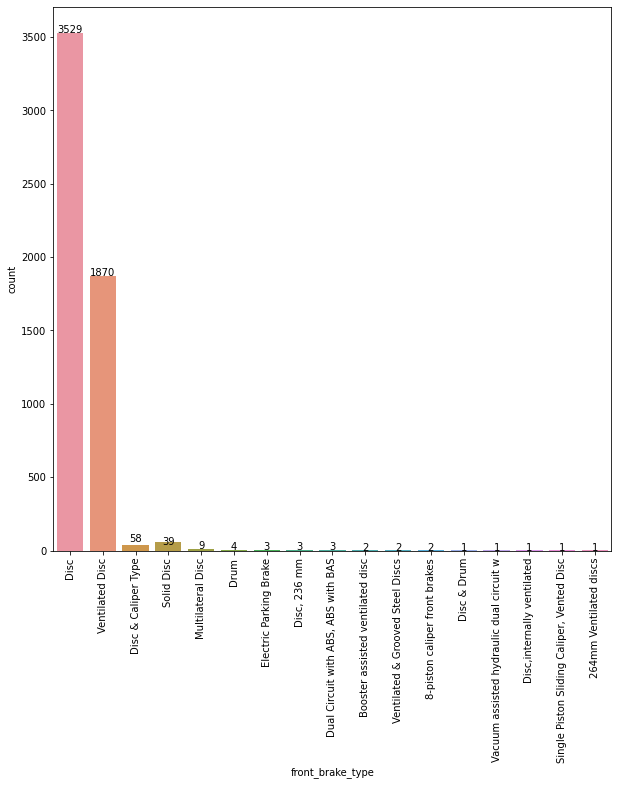

In [102]:
plt.figure(figsize=(10,10))
sns.countplot(x='front_brake_type',data=df)
plt.xticks(rotation=90)
for i,val in enumerate(df['front_brake_type'].value_counts()):
    y=val
    
    x=i

    
    plt.text(x,y,str(y),ha='center')

plt.show()

### Observation:- Disc and Ventilated disc having more frequency than other type

In [103]:
### rear_brake_type
df['rear_brake_type']=df['rear_brake_type'].replace({'Discs':'Disc','drum':'Drum',
                                                    'Drums':'Drum','Drum`':'Drum',
                                                   'Drums 180 mm':'Drum',
                                                    'Ventilated discs':'Ventilated Disc',
                                                     'Ventialte Disc':'Ventilated Disc',
                                                    'Ventilated Discs':'Ventilated Disc',
                                                     'ventilated disc':'Ventilated Disc'})

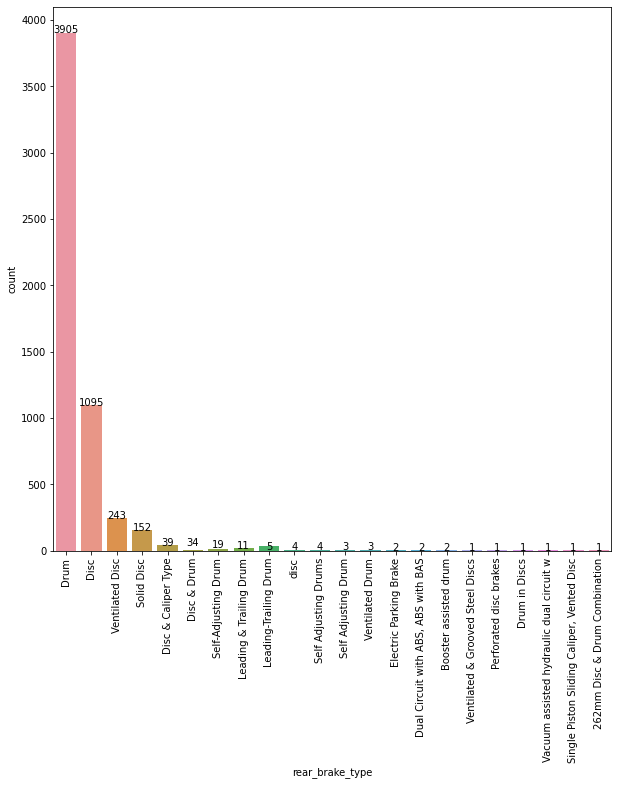

In [104]:
plt.figure(figsize=(10,10))
sns.countplot(x='rear_brake_type',data=df)
plt.xticks(rotation=90)
for i,val in enumerate(df['rear_brake_type'].value_counts()):
    y=val
    
    x=i

    
    plt.text(x,y,str(y),ha='center')

plt.show()

### Observation:-

Rear Break has high frequency Drum than other breaks

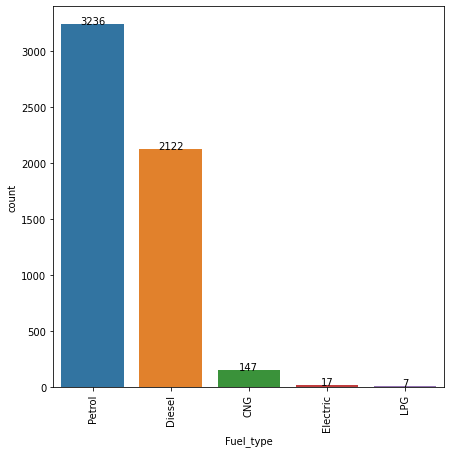

In [105]:
plt.figure(figsize=(7,7))
sns.countplot(x='Fuel_type',data=df)
plt.xticks(rotation=90)
for i,val in enumerate(df['Fuel_type'].value_counts()):
    y=val
    
    x=i

    
    plt.text(x,y,str(y),ha='center')

plt.show()

### Observation:-

Petrol cars having higher frequency

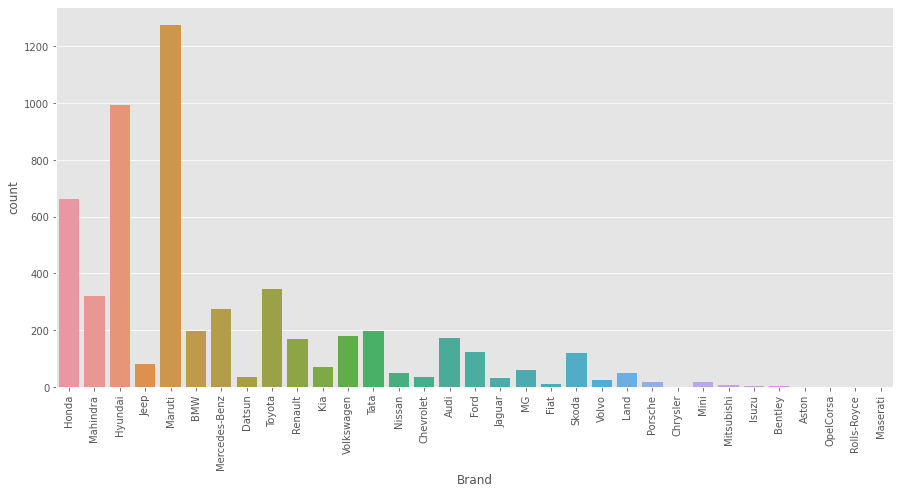

In [106]:
plt.style.use('ggplot')
plt.figure(figsize=(15,7))
sns.countplot(x='Brand',data=df)
plt.xticks(rotation=90)
plt.show()


### Observation:-
Maruti brand has higher freqency

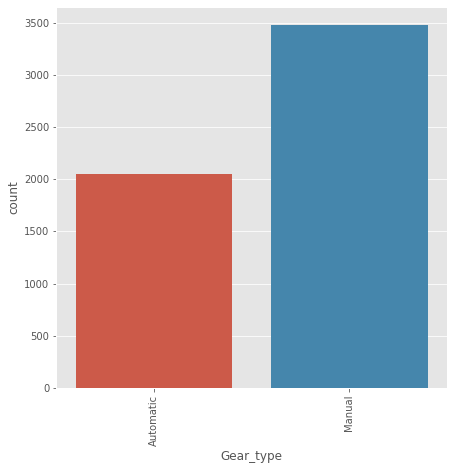

In [107]:
plt.figure(figsize=(7,7))
sns.countplot(x='Gear_type',data=df)
plt.xticks(rotation=90)
plt.show()


### Observation:- Manual has gear type has higher frequency

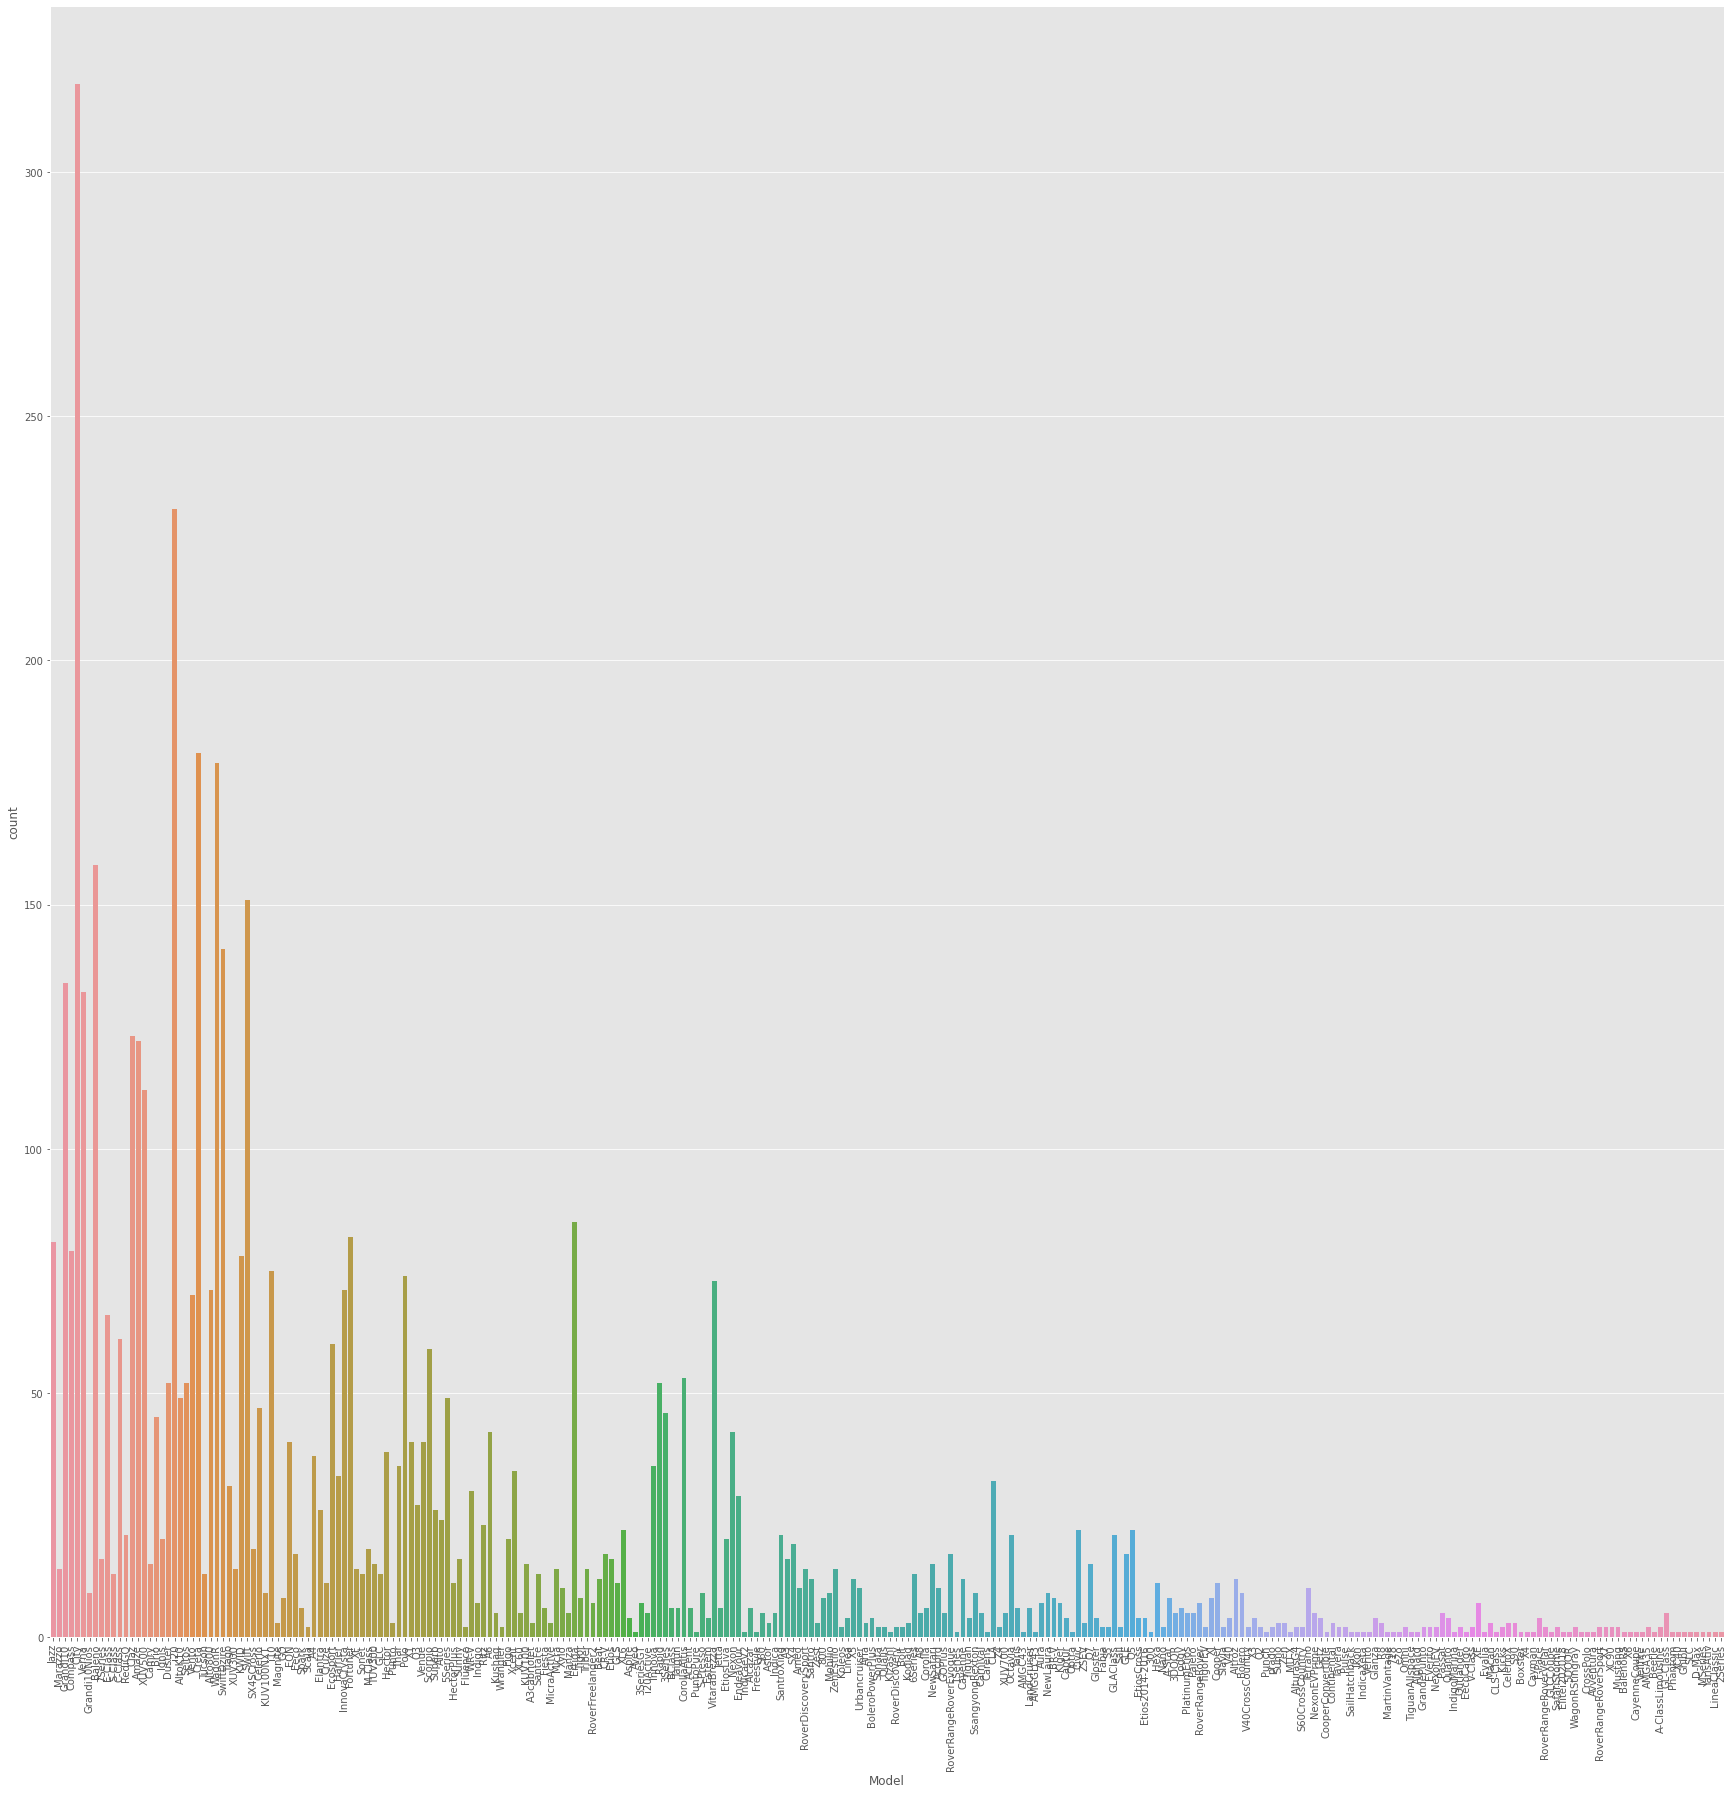

In [108]:
plt.figure(figsize=(30,30))
sns.countplot(x='Model',data=df)
plt.xticks(rotation=90)
plt.show()


In [109]:
### Dropping color because too many catrgories
df.drop('color',axis=1,inplace=True)

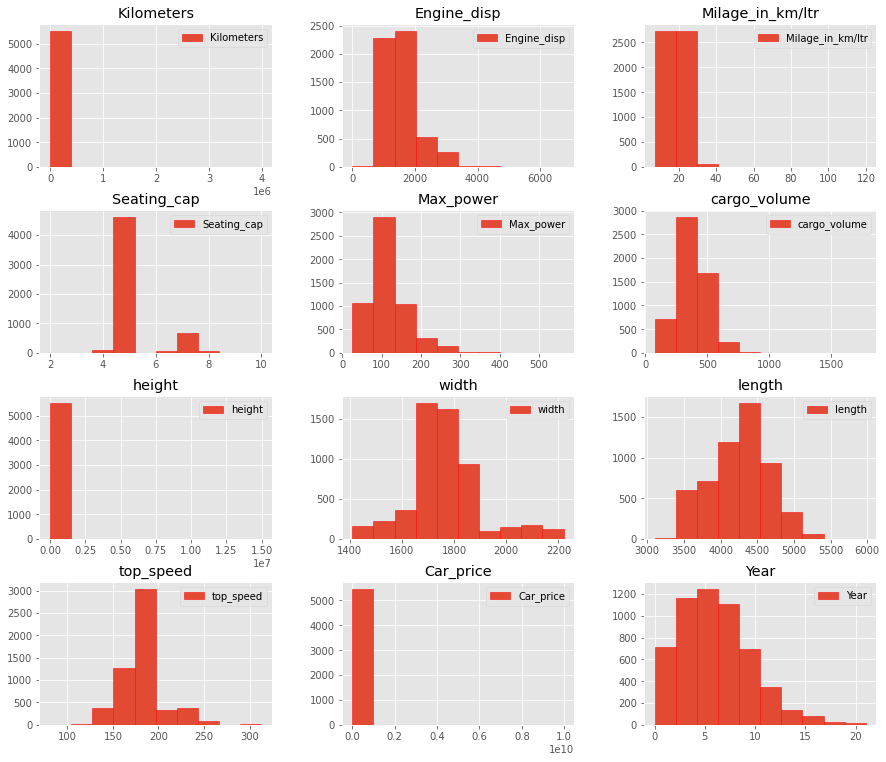

In [110]:
df.hist(figsize=(15,30),edgecolor='red',layout=(9,3),legend=True)
plt.show()


### Observation:-

Clearly most of the features are skewed or unimodal


# Bivariate Analysis

In [111]:
df.columns

Index(['Fuel_type', 'Kilometers', 'Engine_disp', 'Gear_type',
       'Milage_in_km/ltr', 'Seating_cap', 'Max_power', 'front_brake_type',
       'rear_brake_type', 'cargo_volume', 'height', 'width', 'length',
       'top_speed', 'Car_price', 'Year', 'Brand', 'Model'],
      dtype='object')

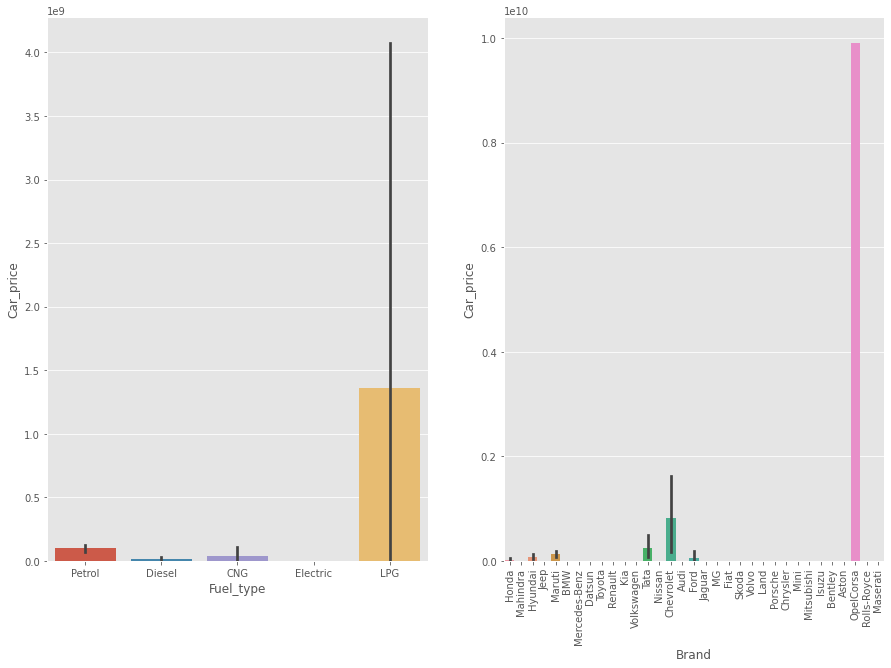

In [112]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.barplot(x='Fuel_type',y='Car_price',data=df)

plt.subplot(1,2,2)
sns.barplot(x='Brand',y='Car_price',data=df)
plt.xticks(rotation=90)

plt.show()

### Observation:-

LPG fuel type has higher price than other 

Car Price Opel Corsa has higher price

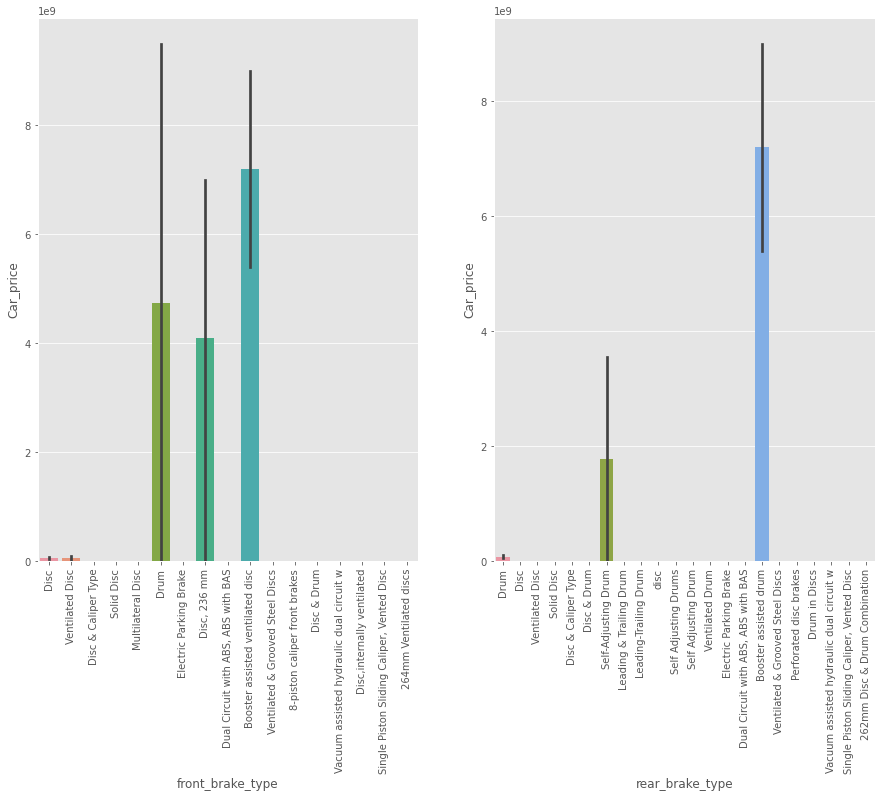

In [113]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.barplot(x='front_brake_type',y='Car_price',data=df)
plt.xticks(rotation=90)
 
plt.subplot(1,2,2)
sns.barplot(x='rear_brake_type',y='Car_price',data=df)
plt.xticks(rotation=90)

plt.show()

### Observation:-

Boosted assisted ventilated disc has higher value in front brake

Boosted assisted drup has hiher price in rear brake

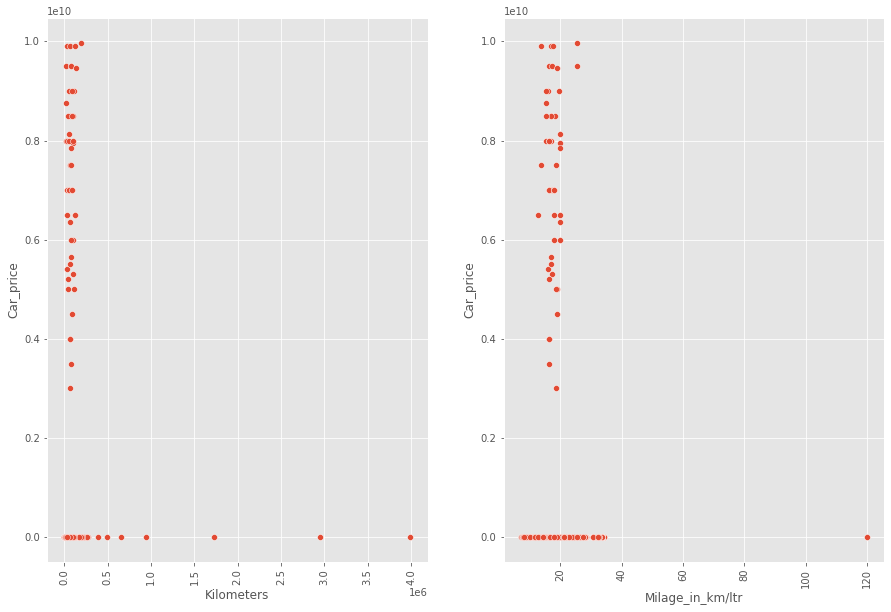

In [114]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.scatterplot(x='Kilometers',y='Car_price',data=df)
plt.xticks(rotation=90)
 
plt.subplot(1,2,2)
sns.scatterplot(x='Milage_in_km/ltr',y='Car_price',data=df)
plt.xticks(rotation=90)

plt.show()

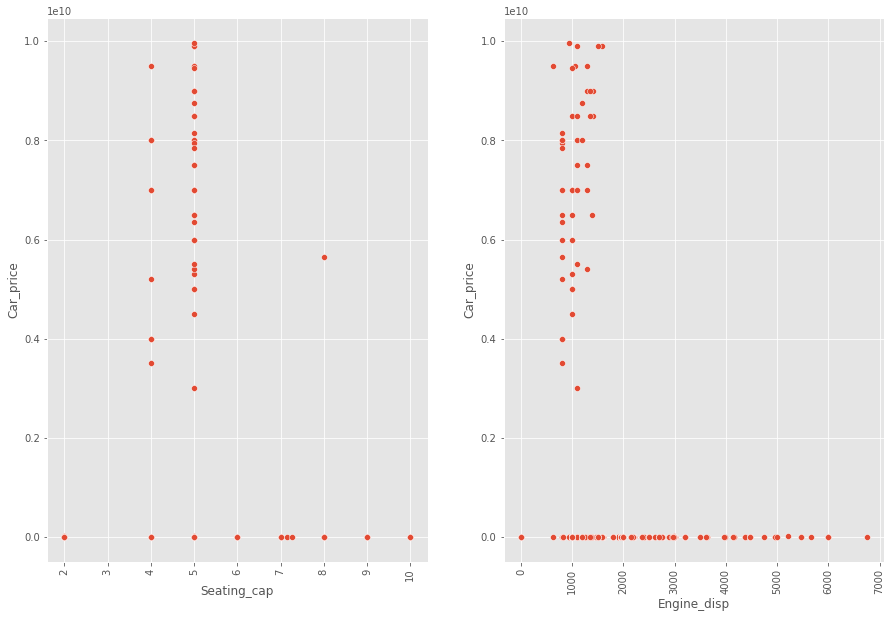

In [115]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.scatterplot(x='Seating_cap',y='Car_price',data=df)
plt.xticks(rotation=90)
 
plt.subplot(1,2,2)
sns.scatterplot(x='Engine_disp',y='Car_price',data=df)
plt.xticks(rotation=90)

plt.show()

### observation:-

Through the plots look like most of the value has zero value

In [116]:

cat=[]
for i in df.columns:
    if df[i].dtypes == 'object':
        cat.append(i)
        
print(cat)

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[cat]=df[cat].apply(le.fit_transform)


['Fuel_type', 'Gear_type', 'front_brake_type', 'rear_brake_type', 'Brand', 'Model']


<AxesSubplot:>

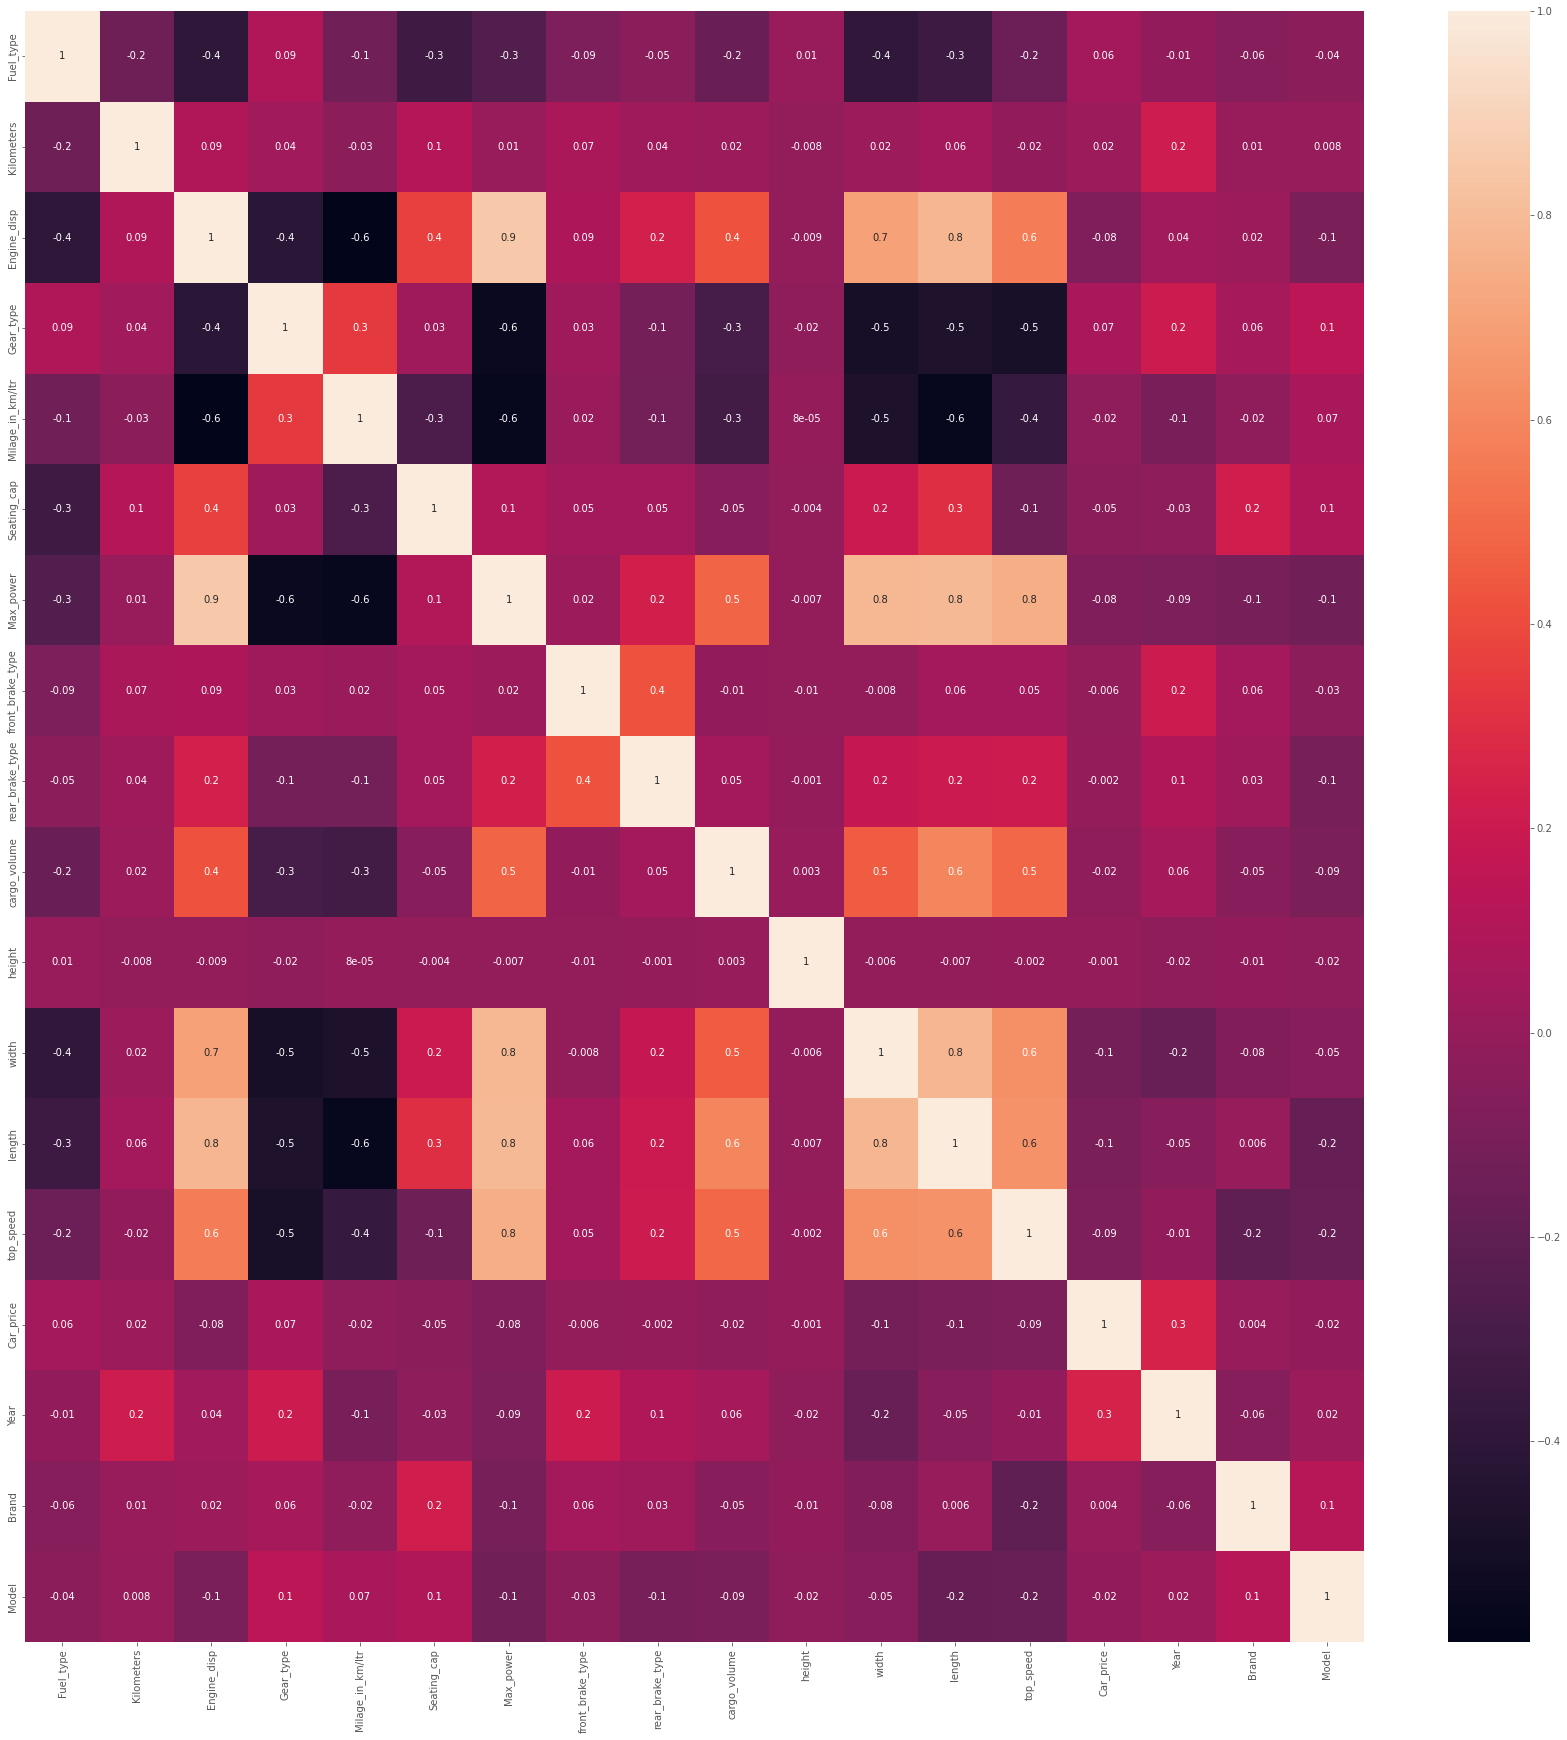

In [117]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':10},fmt='.1g')


### Observation:- Some of the features having multicollinearity problem

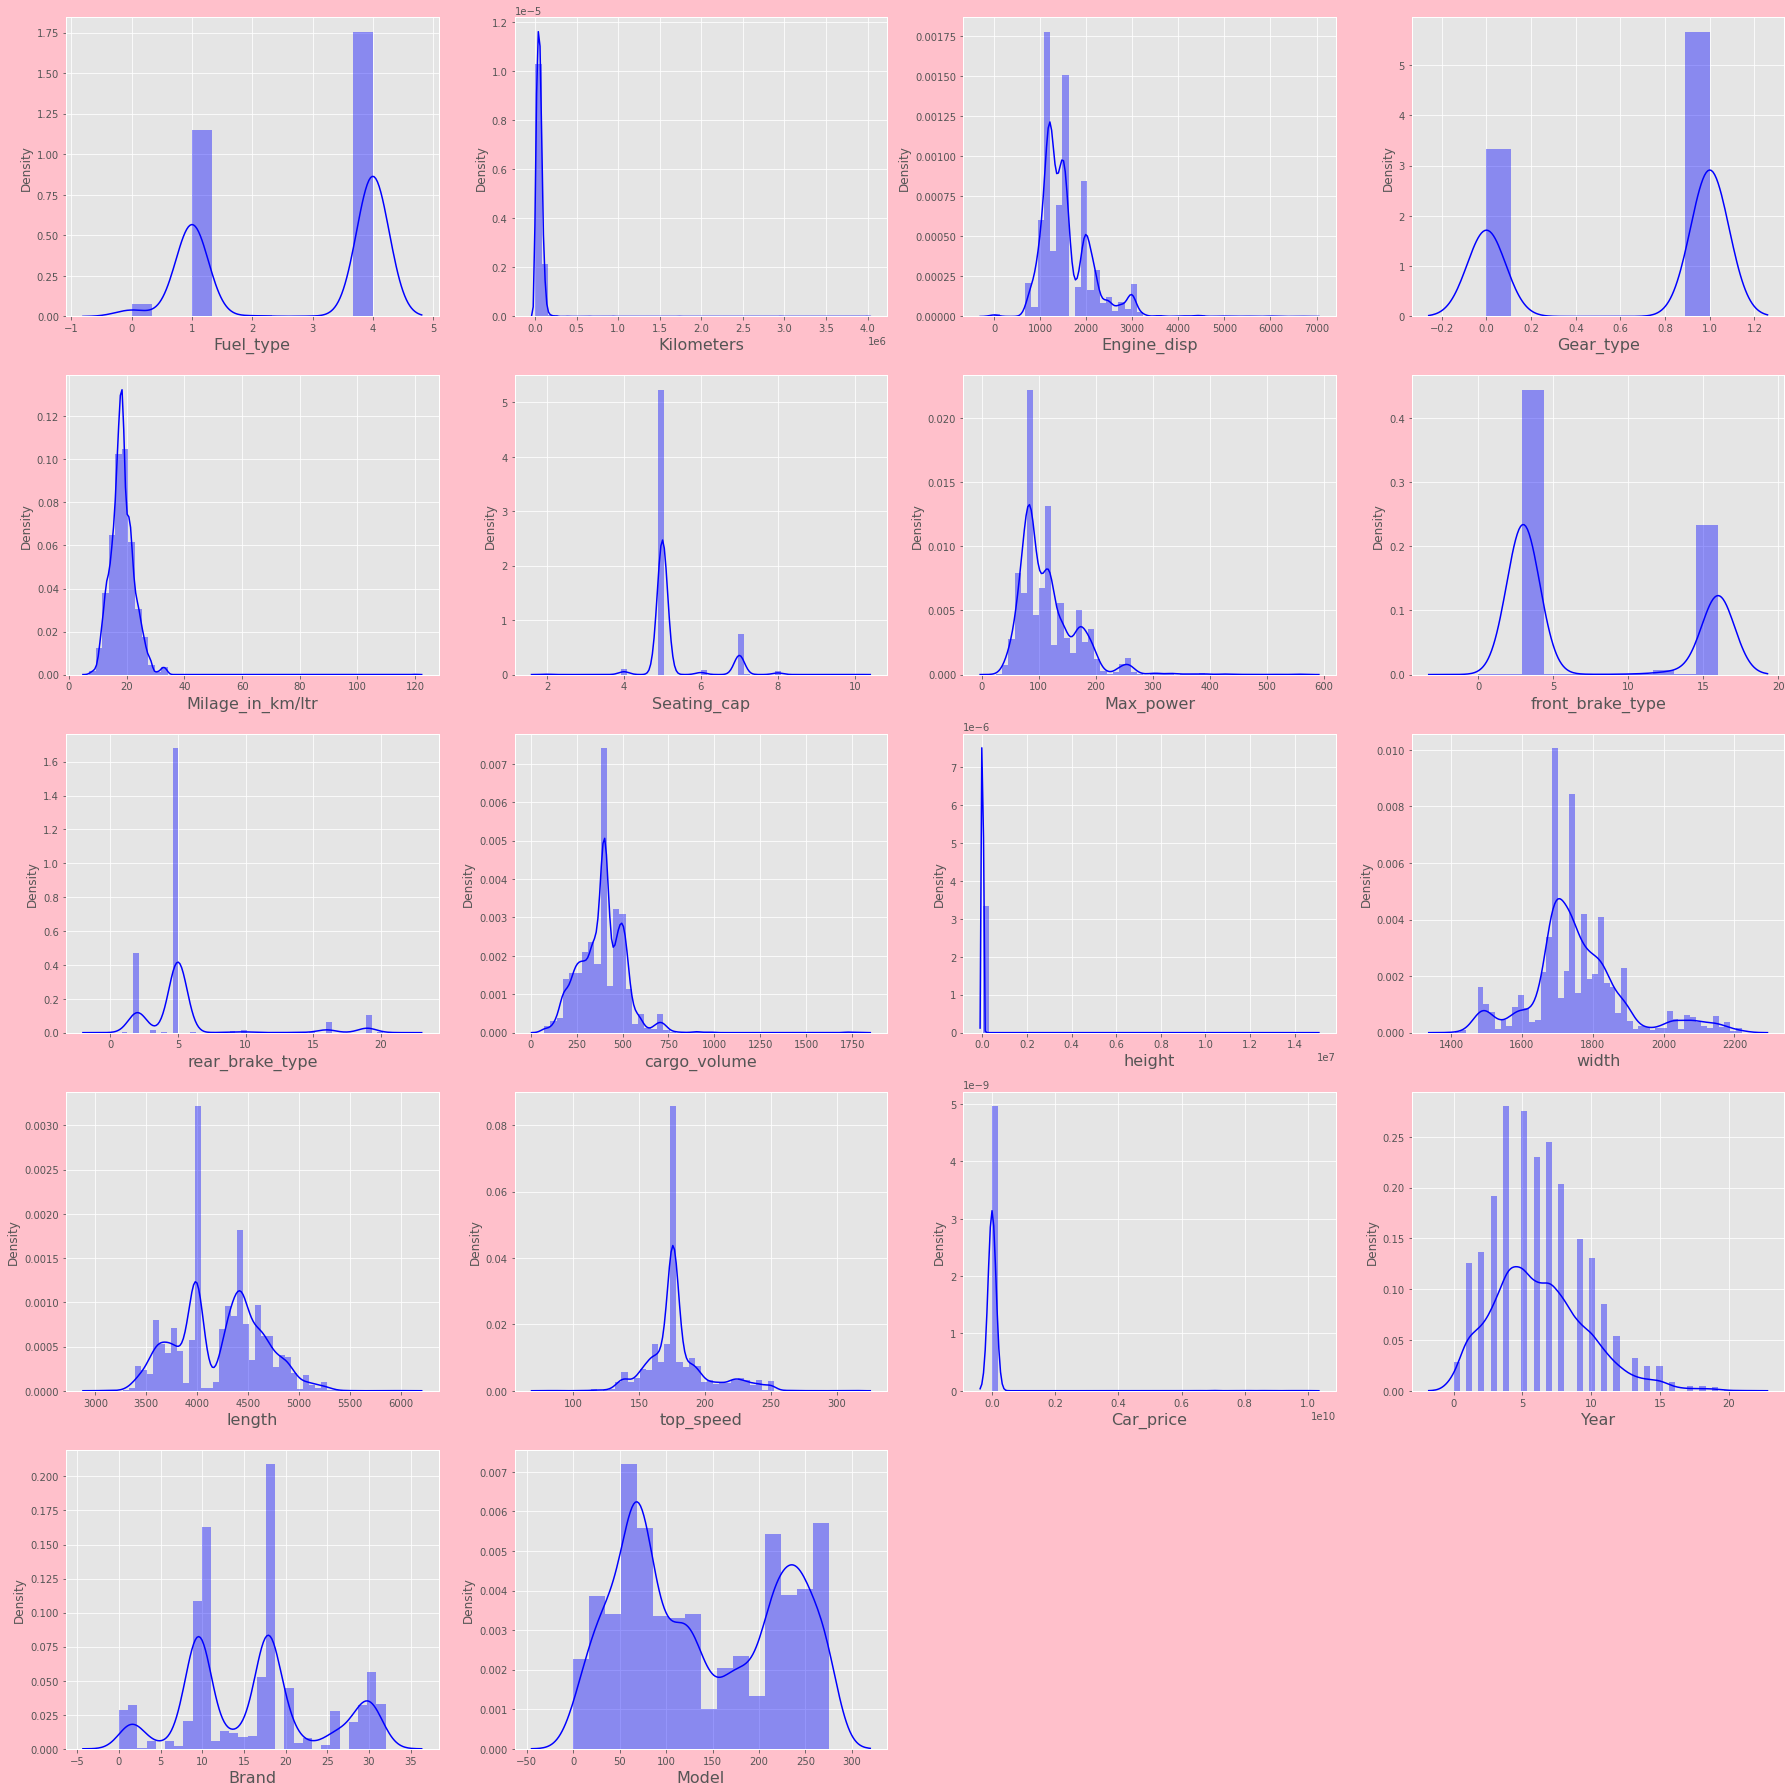

In [118]:
plt.figure(figsize=(25,25),facecolor='pink')

plotnumber=1
for column in df:
    if plotnumber <= 20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df[column],kde=True,color='blue')
        plt.xlabel(column,fontsize=16)
    plotnumber=plotnumber+1
    
plt.tight_layout()


### Observation:- Most of the features are skewed

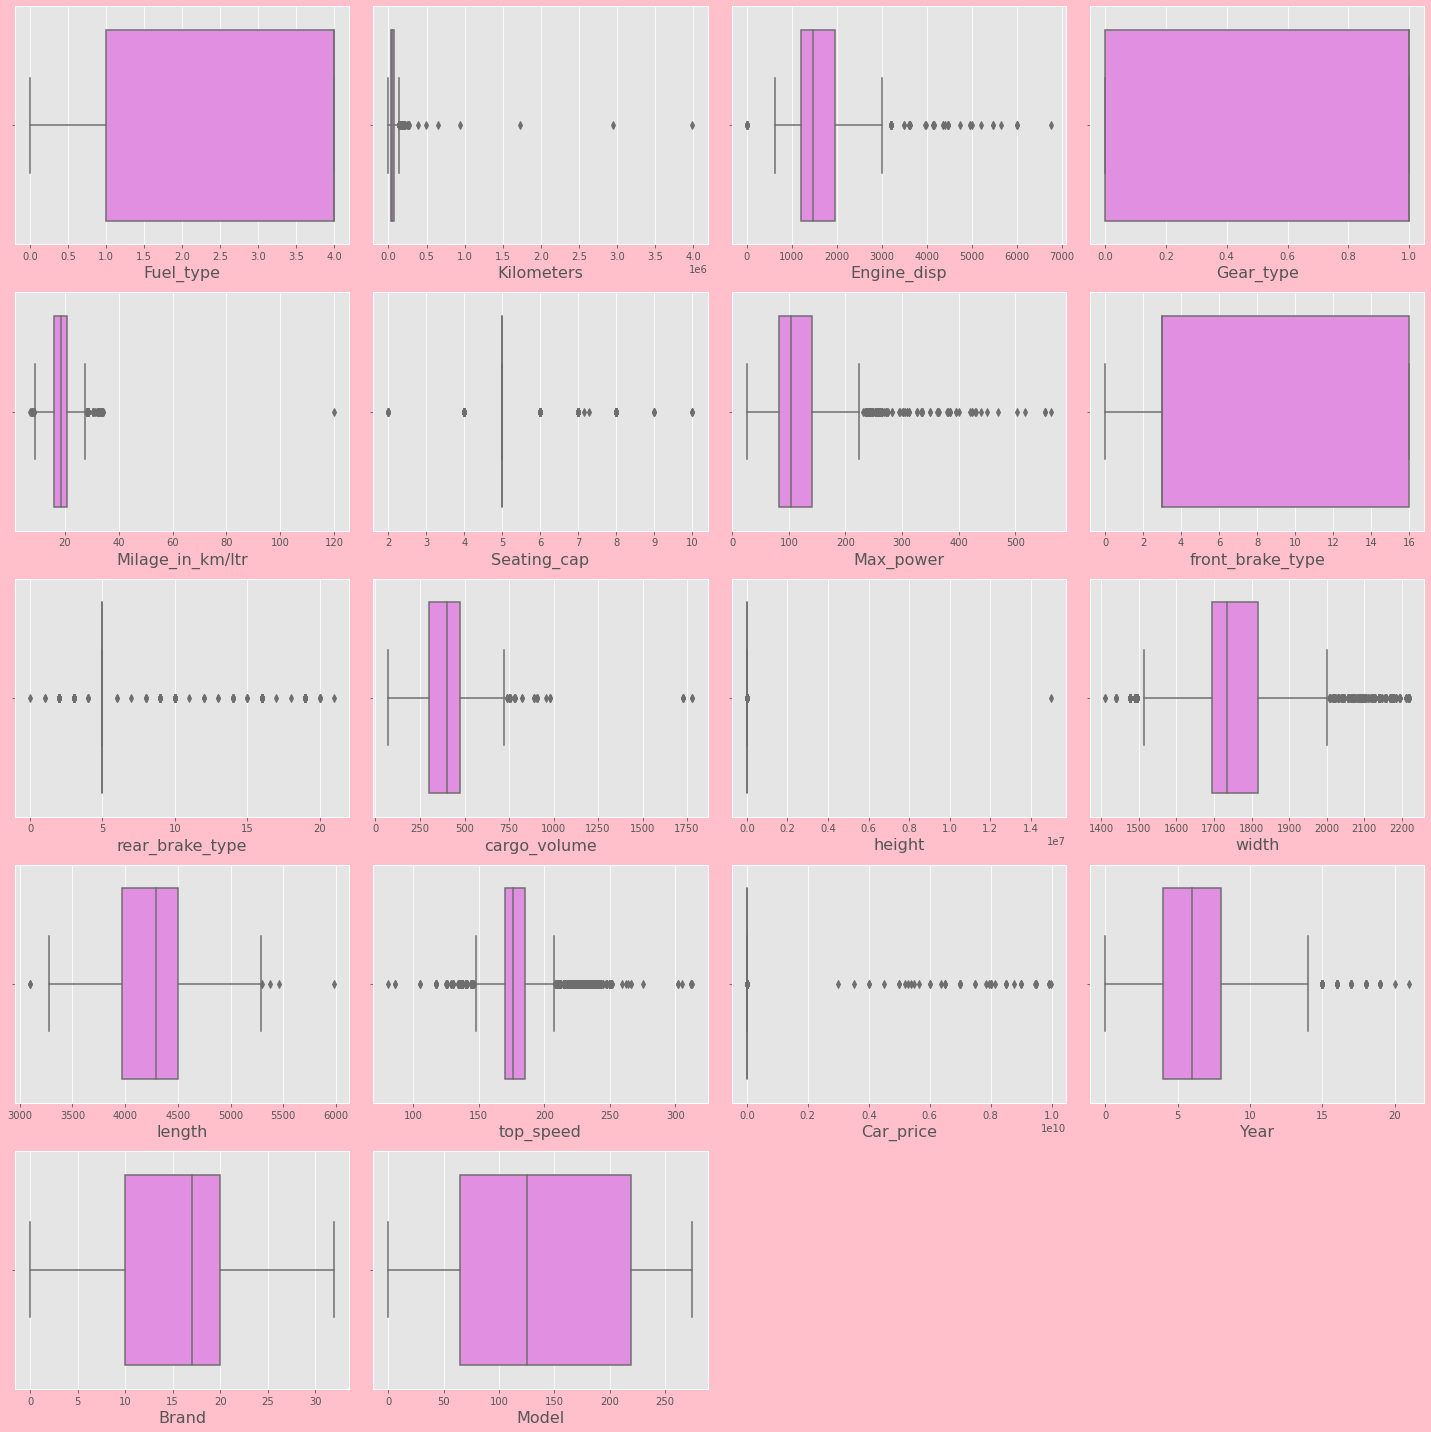

In [119]:
plt.figure(figsize=(20,20),facecolor='pink')

plotnumber=1
for column in df:
    if plotnumber <= 20:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(df[column],color='violet')
        plt.xlabel(column,fontsize=16)
    plotnumber=plotnumber+1
    
plt.tight_layout()


## Removing outliers through zscore

In [120]:
#importing zscore 
from scipy.stats import zscore
df.shape

(5529, 18)

In [121]:
df=df[np.abs(zscore(df)<3).all(axis=1)]


In [122]:
df.shape

(4985, 18)

In [123]:
data_loss=5529-5001
print(data_loss)

528


In [124]:
print('loss_percent',(528/5529)*100)

loss_percent 9.549647314161692


### Observation:- Around 9.5 percent data is lost which is acceptable

In [125]:
index=np.where(df['Car_price']==0)

In [126]:
index

(array([], dtype=int64),)

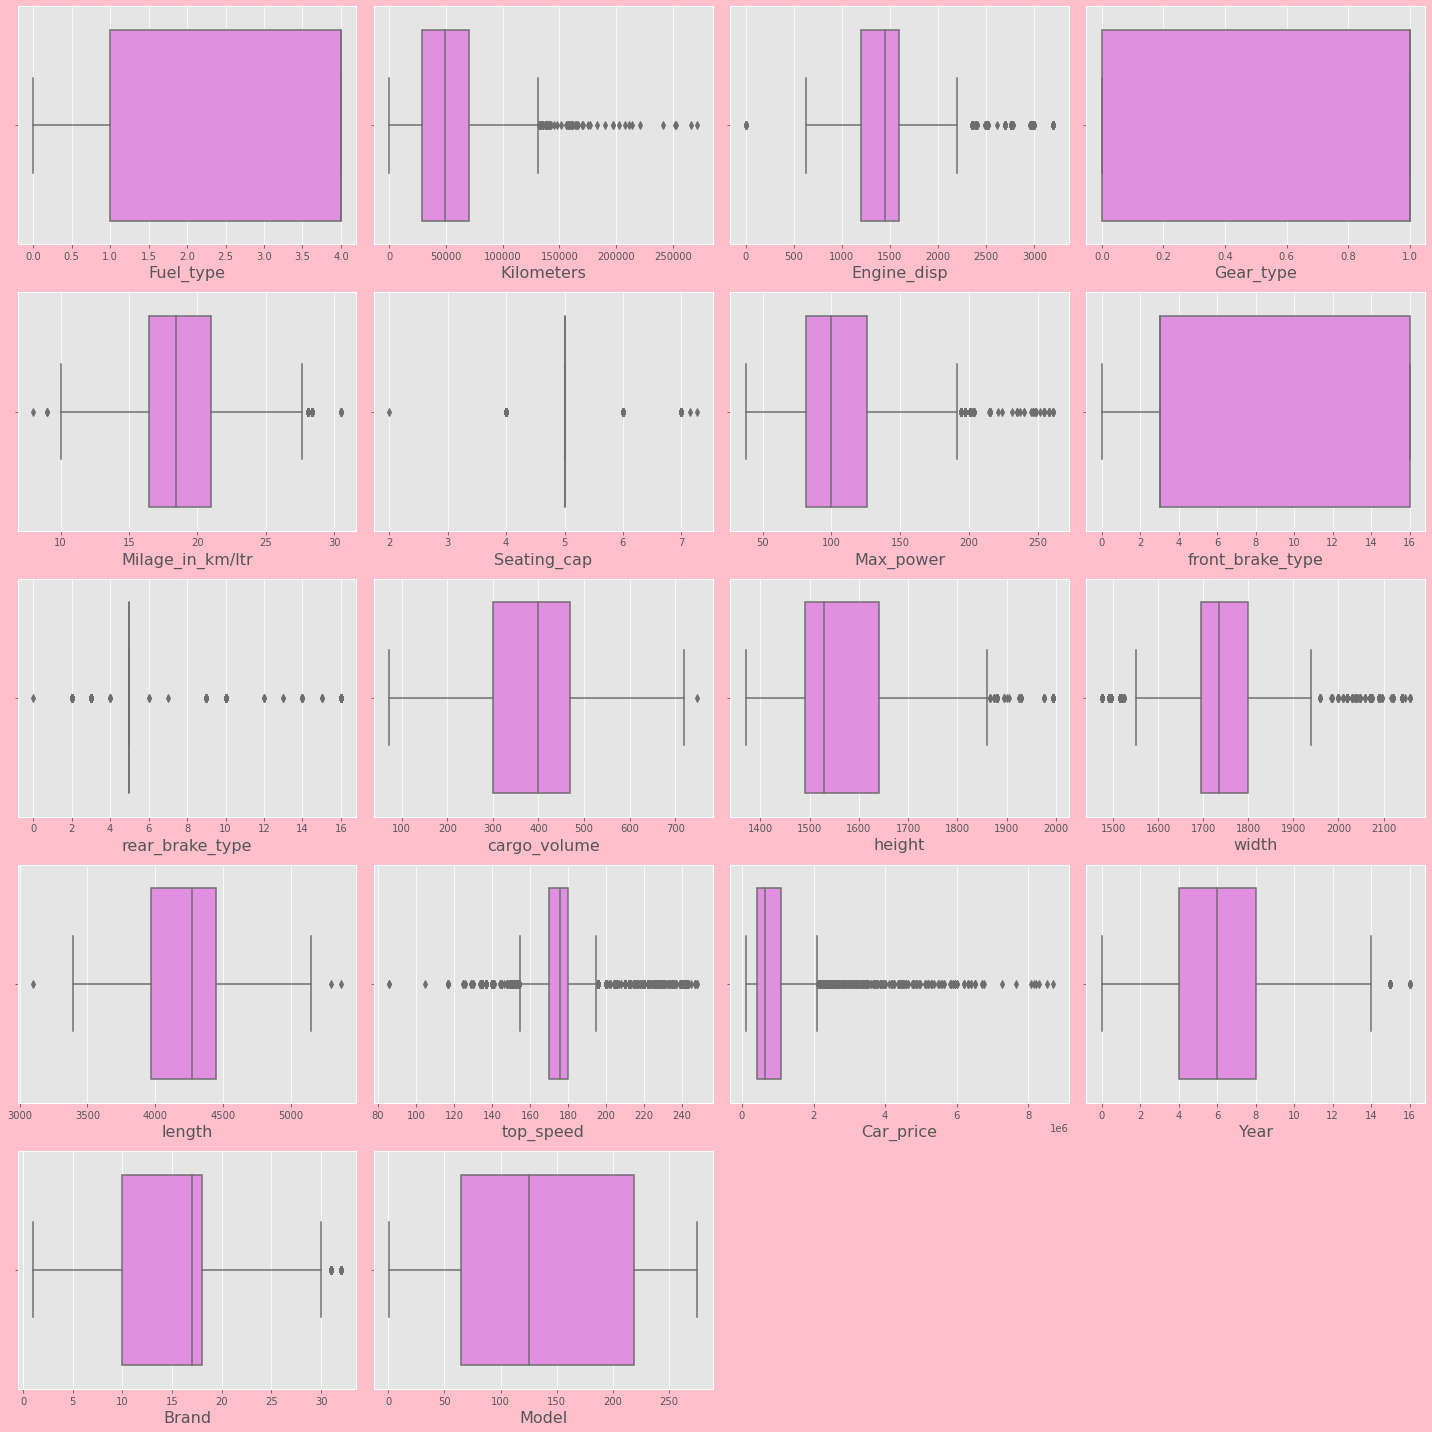

In [127]:
plt.figure(figsize=(20,20),facecolor='pink')

plotnumber=1
for column in df:
    if plotnumber <= 20:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(df[column],color='violet')
        plt.xlabel(column,fontsize=16)
    plotnumber=plotnumber+1
    
plt.tight_layout()


### Observation:- Clearly the outliers are minimized

In [128]:
df.skew()

Fuel_type          -0.533364
Kilometers          1.019589
Engine_disp         1.104693
Gear_type          -0.675629
Milage_in_km/ltr    0.274839
Seating_cap         2.151816
Max_power           0.990845
front_brake_type    0.765990
rear_brake_type     2.928407
cargo_volume        0.024990
height              1.218374
width               0.544175
length              0.003870
top_speed           0.797857
Car_price           3.140081
Year                0.463861
Brand               0.392995
Model               0.187754
dtype: float64

In [129]:
## Separting target variable and label
X=df.drop('Car_price',axis=1)
y=df.Car_price

In [130]:

for i in X:
    if X[i].skew() >= 0.65:
        X[i]=np.sqrt(X[i])
        

In [131]:
X.skew()

Fuel_type          -0.533364
Kilometers         -0.077464
Engine_disp         0.041675
Gear_type          -0.675629
Milage_in_km/ltr    0.274839
Seating_cap         2.057725
Max_power           0.602410
front_brake_type    0.758183
rear_brake_type     1.221197
cargo_volume        0.024990
height              1.140165
width               0.544175
length              0.003870
top_speed           0.495625
Year                0.463861
Brand               0.392995
Model               0.187754
dtype: float64

In [132]:
for i in X:
    if X[i].skew() >= 0.65:
        X[i]=np.sqrt(X[i])


In [133]:
X.skew()

Fuel_type          -0.533364
Kilometers         -0.077464
Engine_disp         0.041675
Gear_type          -0.675629
Milage_in_km/ltr    0.274839
Seating_cap         1.989250
Max_power           0.602410
front_brake_type    0.733070
rear_brake_type     0.303825
cargo_volume        0.024990
height              1.102347
width               0.544175
length              0.003870
top_speed           0.495625
Year                0.463861
Brand               0.392995
Model               0.187754
dtype: float64

In [134]:

for i in X:
    if X[i].skew() >= 0.65:
        X[i]=np.sqrt(X[i])


In [135]:
X.skew()

Fuel_type          -0.533364
Kilometers         -0.077464
Engine_disp         0.041675
Gear_type          -0.675629
Milage_in_km/ltr    0.274839
Seating_cap         1.946992
Max_power           0.602410
front_brake_type    0.548991
rear_brake_type     0.303825
cargo_volume        0.024990
height              1.083743
width               0.544175
length              0.003870
top_speed           0.495625
Year                0.463861
Brand               0.392995
Model               0.187754
dtype: float64

In [136]:
skewed=[]
for i in X:
    if X[i].skew() >= 0.65:
        skewed.append(i)
        


In [137]:
z=X[skewed]

In [138]:
## importing power transform
from sklearn.preprocessing import power_transform

In [139]:
pt=power_transform(z,method='yeo-johnson')

In [140]:
X[skewed]=pt

In [141]:
X[skewed].skew()

Seating_cap   -1.695474
height         0.000000
dtype: float64

### Observation :-
After treating skewness has become 0 and more negative,so dropping these columns

In [142]:
X.drop(columns=['Seating_cap','height'],axis=1,inplace=True)

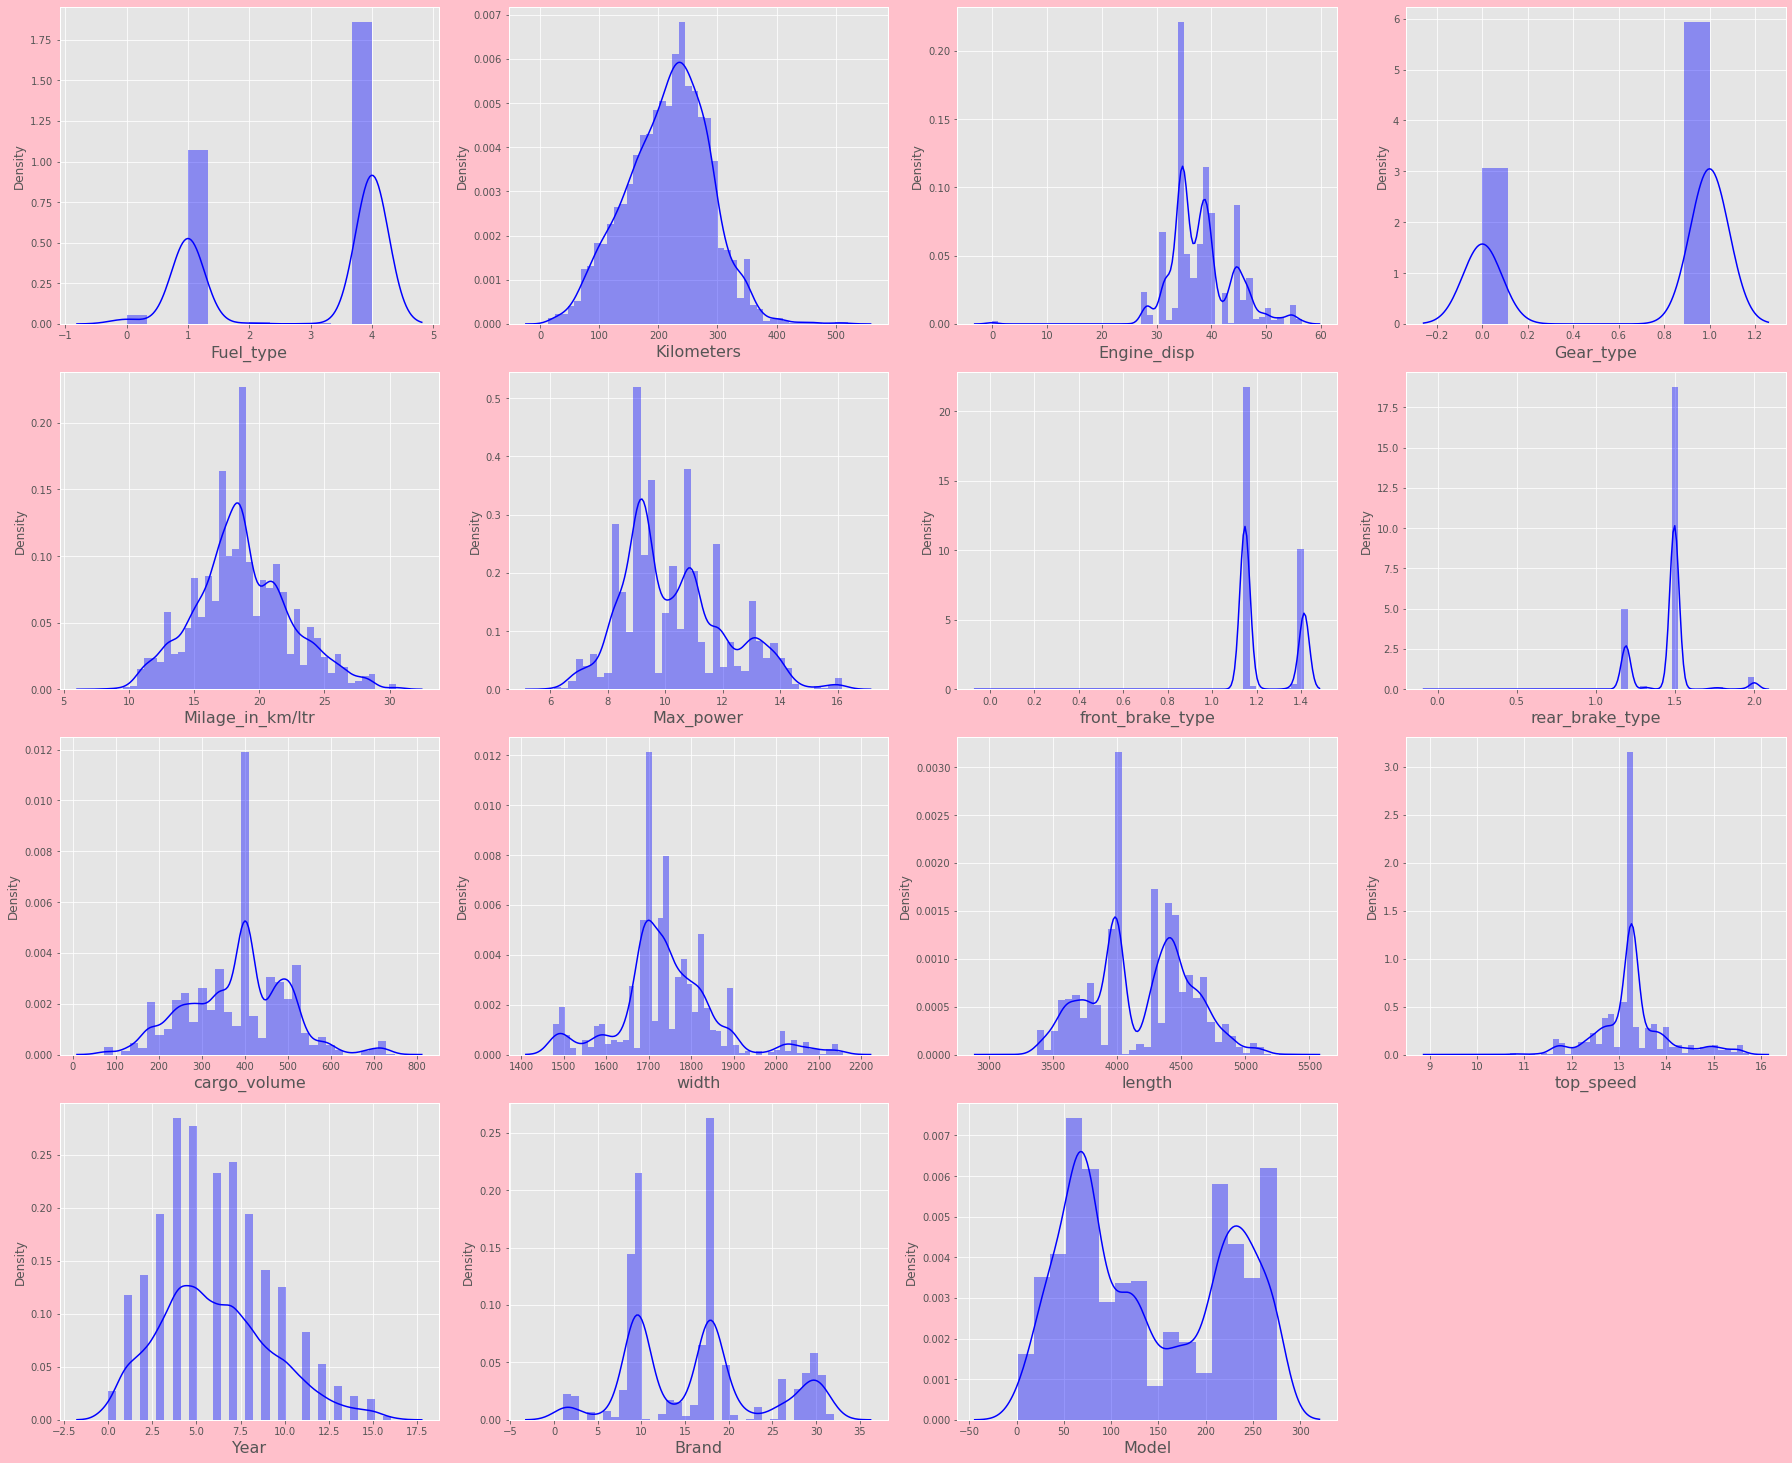

In [143]:
plt.figure(figsize=(25,25),facecolor='pink')

plotnumber=1
for column in X:
    if plotnumber <= 20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(X[column],kde=True,color='blue')
        plt.xlabel(column,fontsize=16)
    plotnumber=plotnumber+1
    
plt.tight_layout()


<AxesSubplot:title={'center':'Correlation with Target'}>

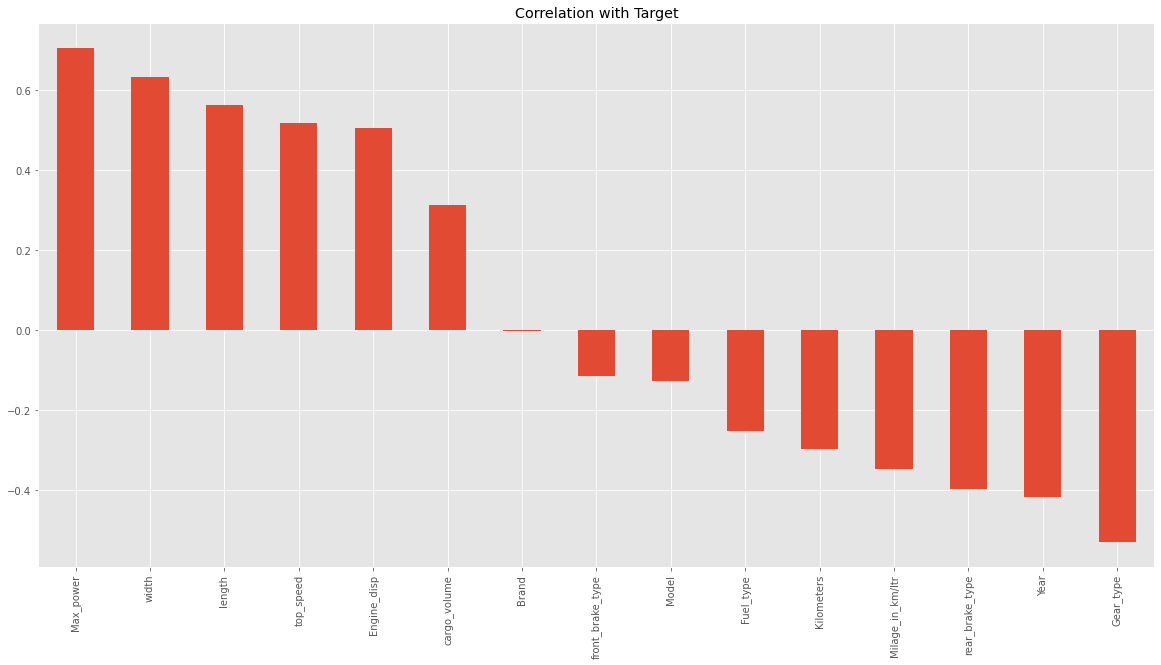

In [144]:
plt.figure(figsize=(20,10))
X.corrwith(y).sort_values(ascending=False).plot(kind='bar',grid=True,title='Correlation with Target')


In [145]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [146]:
scaler=StandardScaler()


In [147]:
x_scaled=scaler.fit_transform(X)


In [148]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features']=X.columns
vif


,vif,features
0,2.280495,Fuel_type
1,1.869320,Kilometers
2,4.174849,Engine_disp
3,1.529798,Gear_type
4,3.023318,Milage_in_km/ltr
5,8.817747,Max_power
6,1.194879,front_brake_type
7,1.408777,rear_brake_type
8,1.908357,cargo_volume
9,3.578486,width


### Observation:- Since vif value is less than 10 so not much multicollinearity in the features

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge,RidgeCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error


In [150]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=41)


In [151]:
import statsmodels.api as sm
X = sm.add_constant(x_scaled)


In [152]:
result = sm.OLS(y, X).fit()


print(result.summary())


                            OLS Regression Results                            
Dep. Variable:              Car_price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     656.9
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:00:38   Log-Likelihood:                -72854.
No. Observations:                4985   AIC:                         1.457e+05
Df Residuals:                    4969   BIC:                         1.458e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.396e+05   7633.427    123.095      0.0

In [153]:
def model(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        ypred=clf.predict(x_train)
        print('Traning r2_score: ',r2_score(y_train,ypred)*100)
    elif train==False:
        y_pred=clf.predict(x_test)
        print('The testing Score-',r2_score(y_test,y_pred)*100)
        print('MSE: ',mean_squared_error(y_test,y_pred))
        print('MAE: ',mean_absolute_error(y_test,y_pred))
        print('RMSE ',np.sqrt(mean_squared_error(y_test,y_pred)))
        sns.regplot(y_pred,y_test)


# Linear Regression

In [154]:
lr= LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [155]:
model(lr,x_train,x_test,y_train,y_test,train = True)


Traning r2_score:  66.58448338425691


The testing Score- 65.7230480422214
MSE:  271636987056.53433
MAE:  323158.76543757156
RMSE  521188.0534476345


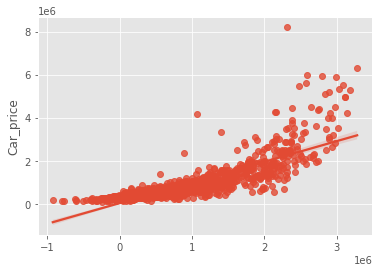

In [156]:
model(lr,x_train,x_test,y_train,y_test,train = False)


## Random Forest

In [157]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)


RandomForestRegressor()

In [158]:
model(rf,x_train,x_test,y_train,y_test,train = True)


Traning r2_score:  98.83794250007168


The testing Score- 92.04296156006917
MSE:  63057705667.0097
MAE:  106195.81154771452
RMSE  251112.9340894445


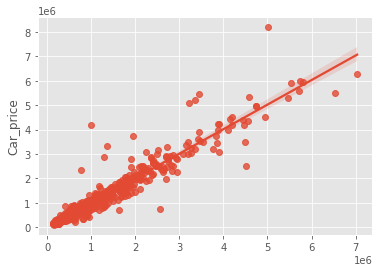

In [159]:
model(rf,x_train,x_test,y_train,y_test,train = False)


In [160]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(rf,x_scaled,y,cv=5).mean())


0.9057165472103395


## XGBoost

In [161]:
xgb=XGBRegressor()
xgb.fit(x_train,y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [162]:
model(xgb,x_train,x_test,y_train,y_test,train = True)


Traning r2_score:  99.68163402561375


The testing Score- 93.27566100609464
MSE:  53288845125.46947
MAE:  101866.94486768244
RMSE  230843.76778563778


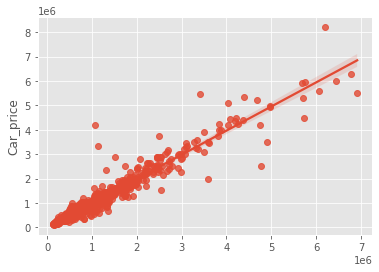

In [163]:
model(xgb,x_train,x_test,y_train,y_test,train = False)


In [164]:
print(cross_val_score(xgb,x_scaled,y,cv=5).mean())


0.9095882873402992


# KNN

In [168]:
knn=KNeighborsRegressor()
knn=knn.fit(x_train,y_train)


In [169]:
model(knn,x_train,x_test,y_train,y_test,train = True)



Traning r2_score:  92.19034174351668


The testing Score- 88.5848191523822
MSE:  90462691547.71451
MAE:  136212.1892542101
RMSE  300770.16399190016


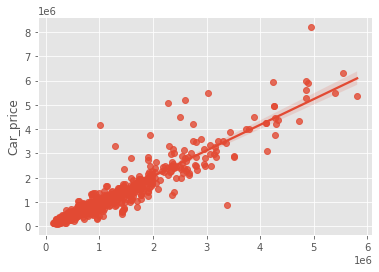

In [170]:
model(knn,x_train,x_test,y_train,y_test,train = False)


In [171]:
print(cross_val_score(knn,x_scaled,y,cv=5).mean())


0.8702007113985337


## Conclusion:-

XGBoost regressor is best performing model with testing r2_score is 93% 

Also this model has lowest mean_squared_error and mean_absolute_error

The cross_Validation_Score is 90%

In [172]:
### Hyperparameter tunning
from sklearn.model_selection import GridSearchCV


In [173]:
params={'learning_rate':[0.001,0.1,0.003,0.02],
       'n_estimators':[100],
       'max_depth':[1,2,3,4,5,6,7,8,9],}


In [174]:
gs=GridSearchCV(xgb,param_grid=params,n_jobs=-1)
gs.fit(x_train,y_train)


GridSearchCV(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat_to_onehot=4, max_delta_step=0,
                                    max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
   

In [175]:
gs.best_params_


{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100}

In [176]:
xgb=XGBRegressor(learning_rate=0.1,max_depth=8,n_estimators=100)
xgb.fit(x_train,y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [177]:
model(xgb,x_train,x_test,y_train,y_test,train = True)


Traning r2_score:  99.62951847071186


The testing Score- 93.17575765441565
MSE:  54080556286.96231
MAE:  99068.7314930834
RMSE  232552.26571023194


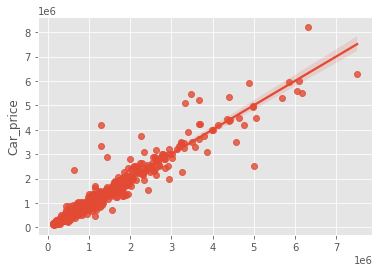

In [178]:
model(xgb,x_train,x_test,y_train,y_test,train =False)


In [179]:
print(cross_val_score(xgb,x_scaled,y,cv=5).mean())


0.9210414400712083


In [180]:
y_pred=xgb.predict(x_test)


In [181]:
Report=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})


In [182]:
Report

,Actual,Predicted
4692,1375000.0,1.440650e+06
595,895000.0,9.043365e+05
5059,535000.0,5.641746e+05
354,1390000.0,1.341371e+06
3393,3990000.0,3.978846e+06
...,...,...
1078,635000.0,6.333455e+05
2355,6300000.0,7.509387e+06
3445,5350000.0,4.402528e+06
5112,1290000.0,1.249552e+06


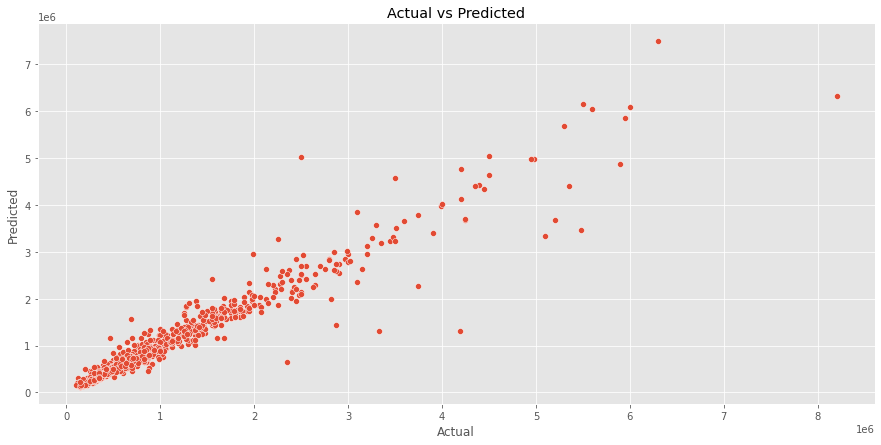

In [183]:
plt.figure(figsize=(15,7))
sns.scatterplot(y_test,y_pred,palette="deep")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


# Saving The model

In [184]:
import pickle
filename='Car_price_prediction'
pickle.dump(xgb,open(filename,'wb'))
